# Mortality Prediction Model

## Introduction
Accurate prediction of mortality is of great importance in _public health research_, enabling proactive healthcare planning, resource allocation, and policy development. **Mortality prediction** models that incorporate relevant predictors can assist healthcare providers and policymakers in identifying high-risk populations, implementing targeted interventions, and improving overall healthcare outcomes. While several approaches have been explored in mortality prediction, the integration of health indicators and socioeconomic factors has shown promise in capturing the complex relationship between individual health characteristics and mortality risk.  
This research aims to develop a _mortality prediction model_ using a **Gaussian Naive Bayes classification** approach that incorporates various health indicators. **Naive Bayes** is a well-established and computationally efficient classification algorithm that assumes independence between predictors, Gaussian Naive Bayes also assumes the features distributions are Gaussian.

## Data Description

### Data Source
The used dataset is the NDI (National Death Index) Mortality Data, The NCHS (National Center for Health Statistics) has linked data from various surveys with death certificate records from the National Death Index (NDI).
Some of the surveys are:
- National Health Interview Survey (NHIS): 1986 – 2018
- National Health and Nutrition Examination Surveys (NHANES): 1999-2018
- Third National Health and Nutrition Examination Survey (NHANES III)
- NHANES I Epidemiologic Follow-up Study (NHEFS)
- National Nursing Home Surveys (NNHS): 1985, 1995, 1997, 2004
- The Second Longitudinal Study of Aging (LSOA II)

The dataset consists of 8579 records, 18 features and one label column.

### Dataset Features Description

| Feature            | Description                                                                                                                                                                                                    |
| ------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Age                | A numerical representation of an individual's age.                                                                                                                                                             |
| Diastolic BP       | The blood pressure when the heart is at rest, indicating the pressure on artery walls during relaxation.                                                                                                       |
| Poverty Index      | A measure of poverty levels within a population or area, considering socioeconomic factors.                                                                                                                    |
| Race               | Categorization based on ethnic or racial backgrounds, represented by specific values for different groups. (1: Non-Hispanic White, 2: Non-Hispanic Black or African American, 3: Mexican American or Hispanic) |
| Red Blood Cells    | Blood cells that carry oxygen throughout the body using the protein hemoglobin.                                                                                                                                |
| Sedimentation Rate | Measures how quickly red blood cells settle in a test tube, often indicating inflammation or certain diseases.                                                                                                 |
| Serum Albumin      | Liver-produced protein that helps maintain fluid balance and transports substances in the blood.                                                                                                               |
| Serum Cholesterol  | Measures the amount of cholesterol in the blood, which can impact heart disease risk.                                                                                                                          |
| Serum Iron         | Measures the concentration of iron in the blood, essential for red blood cell production and oxygen transport.                                                                                                 |
| Serum Magnesium    | Measures the level of magnesium, an important mineral involved in various bodily functions.                                                                                                                    |
| Serum Protein      | Measures the total amount of proteins in the blood, with multiple roles in the body.                                                                                                                           |
| Sex                | Biological categorization of individuals as male or female. (1: Male, 2: Female)                                                                                                                               |
| Systolic BP        | The blood pressure when the heart contracts, representing maximum pressure during a heartbeat.                                                                                                                 |
| TIBC               | Total Iron-Binding Capacity: Measures the capacity of proteins to bind with iron, providing information about iron levels and related disorders.                                                               |
| TS                 | Transferrin Saturation: Percentage of transferrin protein's iron-binding sites occupied by iron, indicating the body's iron status.                                                                            |
| White Blood Cells  | Immune cells that defend against infections and foreign substances.                                                                                                                                            |
| BMI                | Body Mass Index: Numeric value calculated from weight and height, used to assess weight status and potential obesity.                                                                                          |
| Pulse Pressure     | Difference between systolic and diastolic blood pressure, reflecting heart force and artery health.                                                                                                            |
| Death              | Binary value indicating low or high risk of death in the next 10 years based on specific factors or predictive models. (0: Low risk of death in 10 years, 1: High risk of death in 10 years)                   |


## Data Preparation and EDA


### Importing Packages & Dataset


In [1]:
# Importing packages we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
import missingno as msn
import math
from scipy.stats import boxcox
from scipy.stats import tstd
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import anderson


In [2]:
# Loading the dataset and taking a look at it
df = pd.read_csv("Data.csv")
df.head()


Age  Diastolic BP  Poverty index  Race  Red blood cells  \
0  35.0          92.0          126.0   2.0             77.7   
1  71.0          78.0          210.0   2.0             77.7   
2  74.0          86.0          999.0   2.0             77.7   
3  64.0          92.0          385.0   1.0             77.7   
4  32.0          70.0          183.0   2.0             77.7   

   Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
0                12.0            5.0              165.0       135.0   
1                37.0            4.0              298.0        89.0   
2                31.0            3.8              222.0       115.0   
3                30.0            4.3              265.0        94.0   
4                18.0            5.0              203.0       192.0   

   Serum Magnesium  Serum Protein  Sex  Systolic BP   TIBC    TS  \
0             1.37            7.6  2.0        142.0  323.0  41.8   
1             1.38            6.4  2.0        156.0  331.0  26.9   
2             1.37            7.4  2.0        170.0  299.0  38.5   
3             1.97            7.3  2.0        172.0  349.0  26.9   
4             1.35            7.3  1.0        128.0  386.0  49.7   

   White blood cells        BMI  Pulse pressure  death  
0                5.8  31.109434            50.0    1.0  
1                5.3  32.362572            78.0    1.0  
2                8.1  25.388497            84.0    1.0  
3                6.7  26.446610            80.0    0.0  
4                8.1  20.354684            58.0    1.0

In [3]:
# Having some insights about our datase
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8579 entries, 0 to 8578
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8579 non-null   float64
 1   Diastolic BP        8579 non-null   float64
 2   Poverty index       8579 non-null   float64
 3   Race                8579 non-null   float64
 4   Red blood cells     8579 non-null   float64
 5   Sedimentation rate  8579 non-null   float64
 6   Serum Albumin       8579 non-null   float64
 7   Serum Cholesterol   8579 non-null   float64
 8   Serum Iron          8579 non-null   float64
 9   Serum Magnesium     8579 non-null   float64
 10  Serum Protein       8579 non-null   float64
 11  Sex                 8579 non-null   float64
 12  Systolic BP         8579 non-null   float64
 13  TIBC                8579 non-null   float64
 14  TS                  8579 non-null   float64
 15  White blood cells   8579 non-null   float64
 16  BMI   

### Dividing Features into Categorical & Quantitative Features


In [4]:
# Our categorical features
categorical_features = ["Race", "Sex", "death"]
print(f"Categorical features are: {[c for c in categorical_features]}")


Categorical features are: ['Race', 'Sex', 'death']


In [5]:
# Our quantitative features
quantitative_features = [
    q for q in df.columns if q not in categorical_features]
print(f"Quantitative features are: {quantitative_features}")


Quantitative features are: ['Age', 'Diastolic BP', 'Poverty index', 'Red blood cells', 'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol', 'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Systolic BP', 'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']


Categorical features:

- Race
- Sex
- Death

Quantitative features:

- Age
- Diastolic BP
- Poverty Index
- Red Blood Cells
- Sedimentation Rate
- Serum Albumin
- Serum Cholesterol
- Serum Iron
- Serum Magnesium
- Serum Protein
- Systolic BP
- TIBC
- TS
- White Blood Cells
- BMI
- Pulse Pressure


### Data Cleaning


<AxesSubplot:>

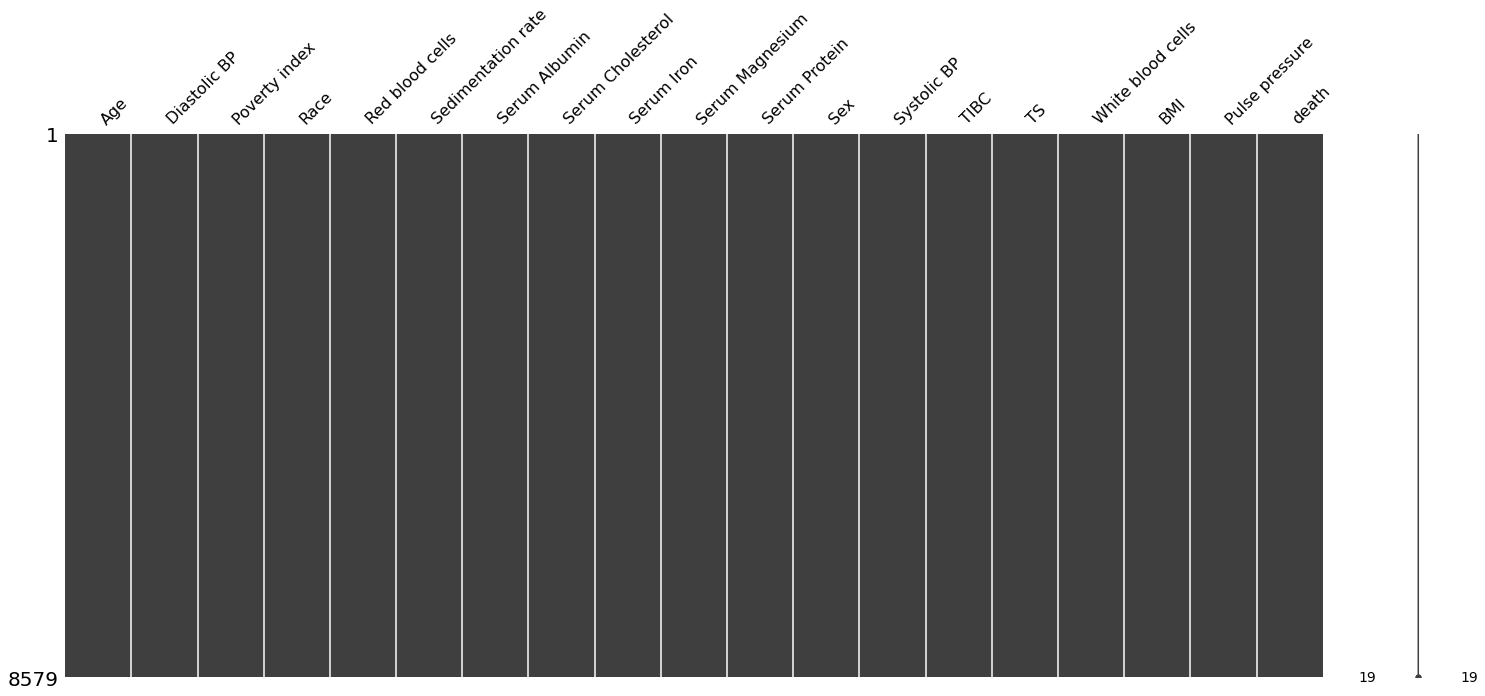

In [6]:
# Searching whether there is any null values or not
msn.matrix(df)


In [7]:
# Checking whether we have any quantitative zero values or not
for feature in df.columns:
    print(f"{feature} : {df[feature].eq(0).any()}")


Age : False
Diastolic BP : False
Poverty index : False
Race : False
Red blood cells : False
Sedimentation rate : False
Serum Albumin : False
Serum Cholesterol : False
Serum Iron : False
Serum Magnesium : False
Serum Protein : False
Sex : False
Systolic BP : False
TIBC : False
TS : False
White blood cells : False
BMI : False
Pulse pressure : False
death : True


In [8]:
# Checking whether we have any duplicate rows or not
df.duplicated().any()


False

## Dealing with outliers


### Visualizing Outliers for all Quantitative Features


Text(0.5, 1.0, 'Box Plots for Quantitative Features')

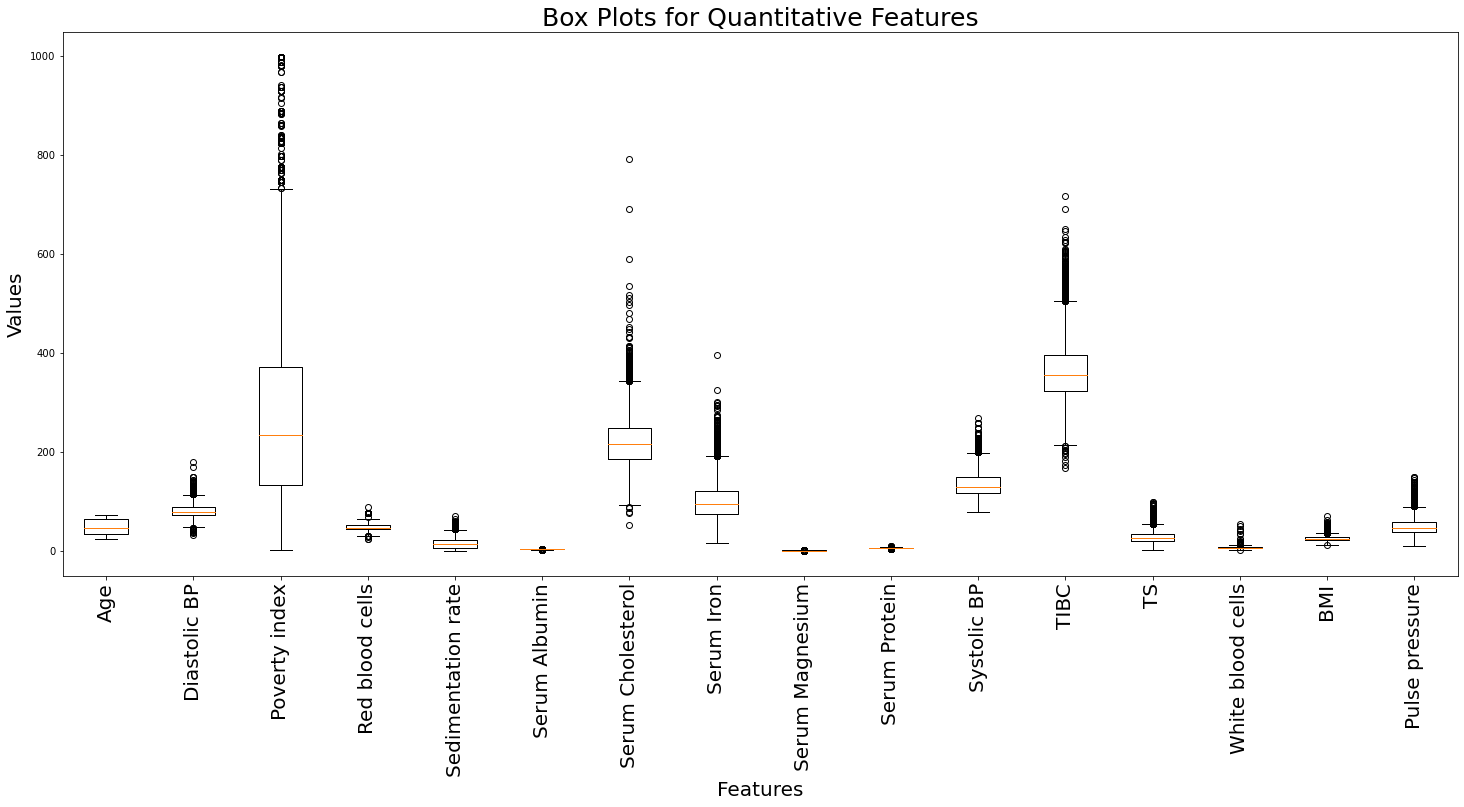

In [9]:
# Plotting box plots for all features
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df[quantitative_features])
ax.set_xticklabels(quantitative_features, rotation='vertical', fontsize="20")
ax.set_xlabel("Features", fontsize="20")
ax.set_ylabel("Values", fontsize="20")
ax.set_title("Box Plots for Quantitative Features",  fontsize="25")


### Visualizing Outliers for each Feature using Box Plots


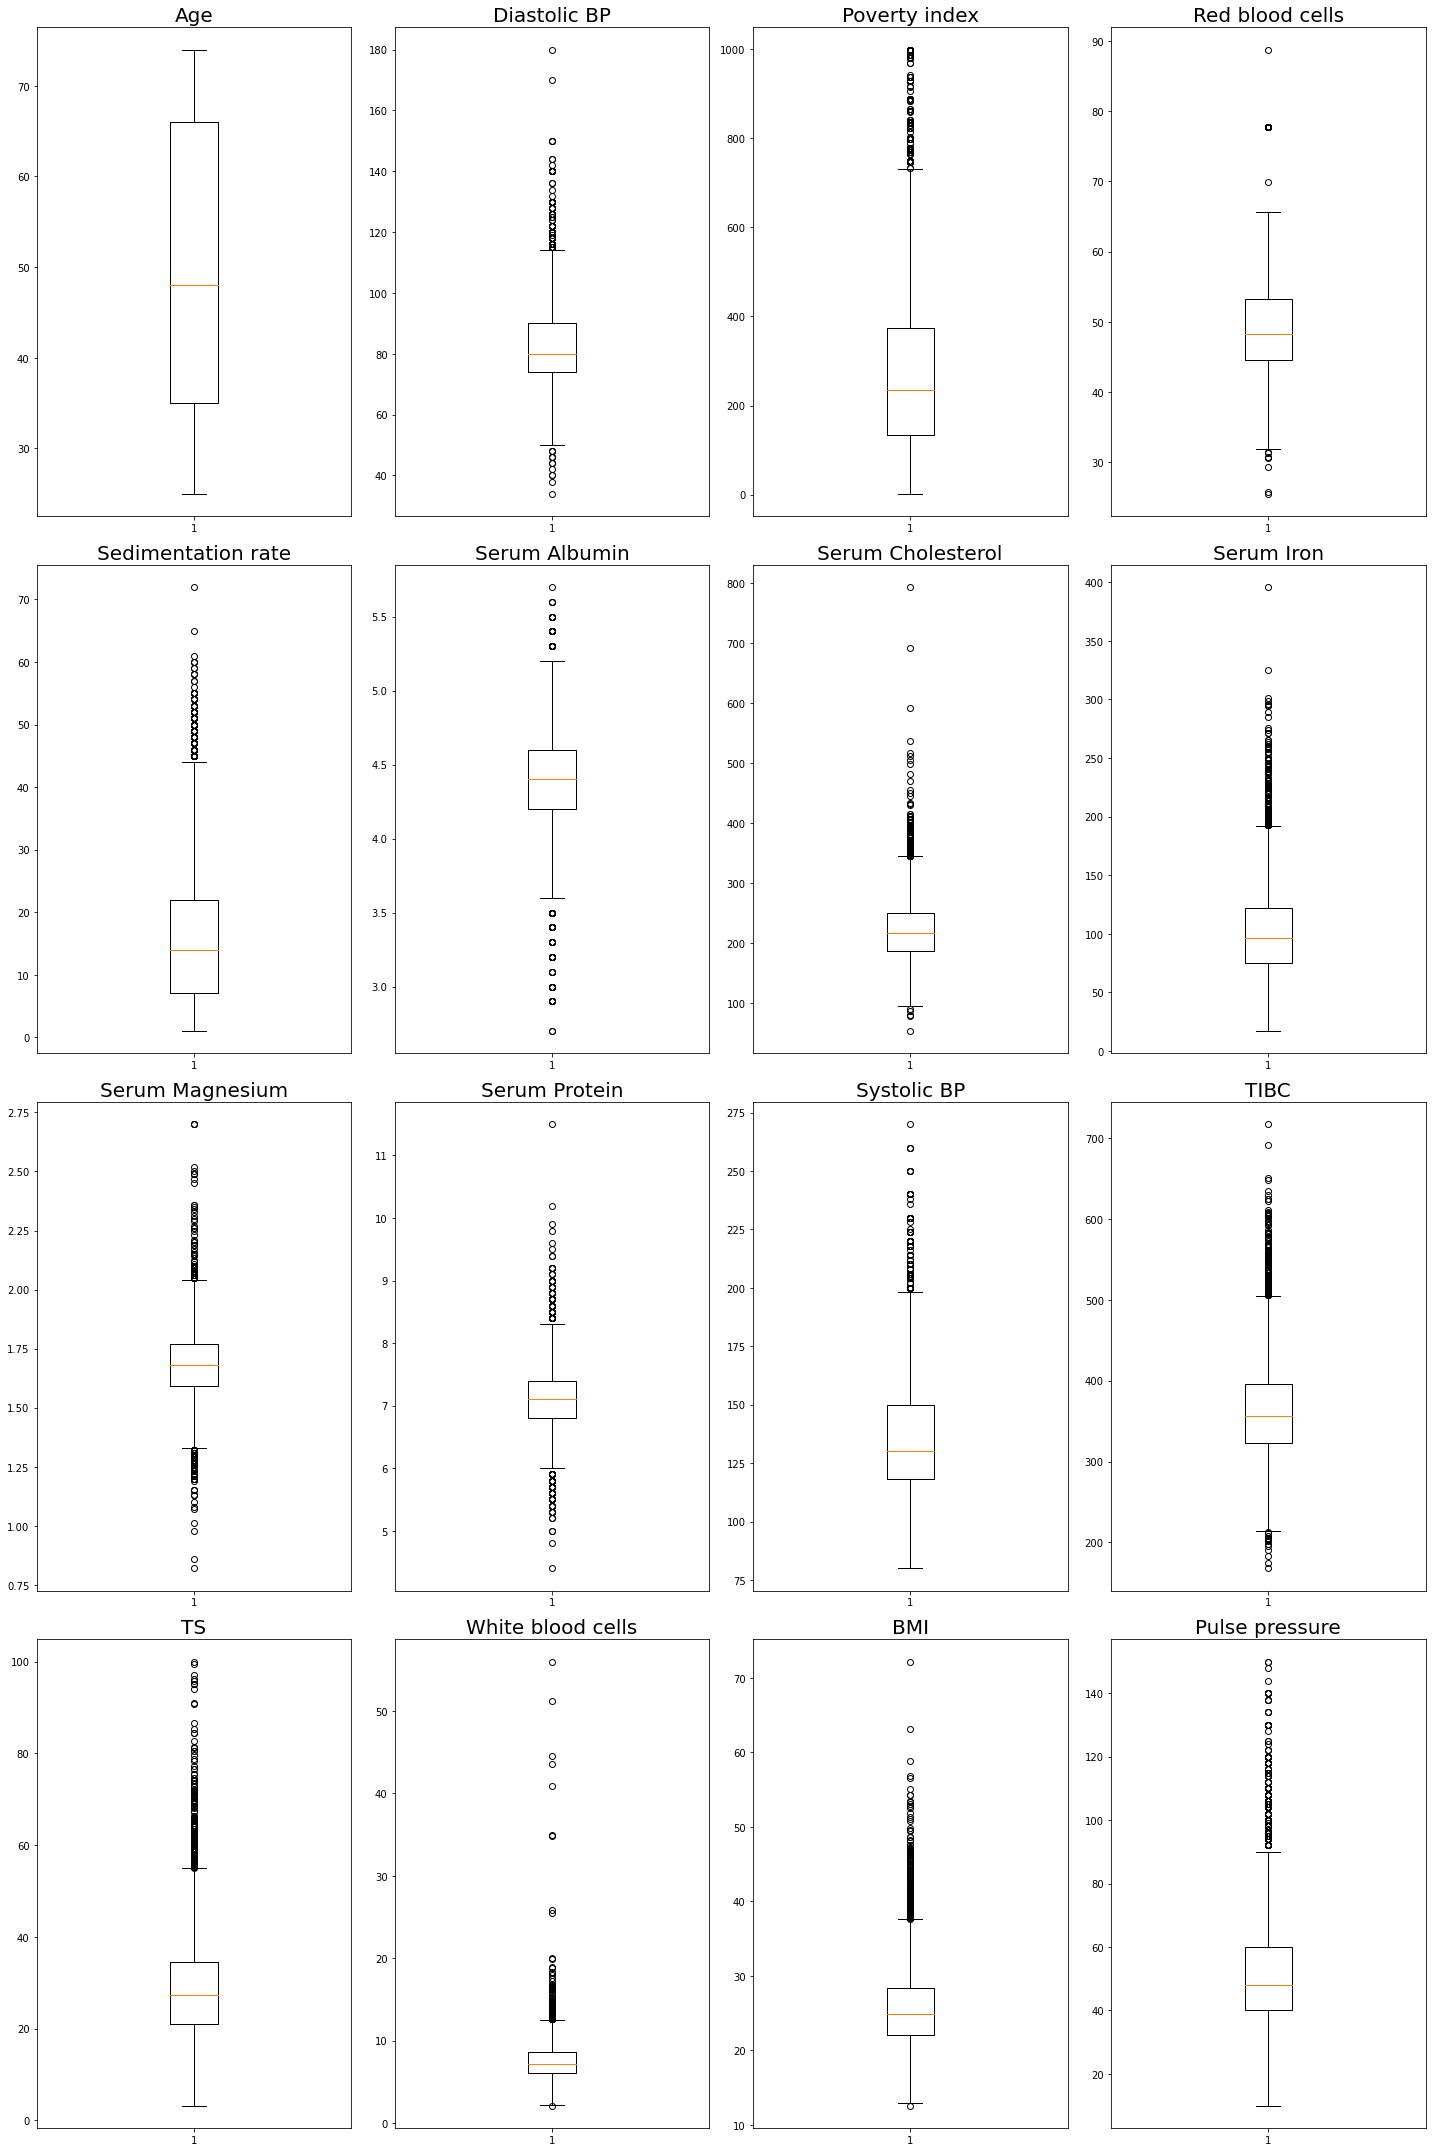

In [10]:
# Plotting box plot for each feature individually

# Creating the grid (We will use this grid later on)
NUM_ROWS = 4
NUM_COLS = 4

# Create the subplots
fig, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(20, 30))

# Iterate over the features and create a subplot for each feature
for i, feature in enumerate(quantitative_features):
    # Calculate the subplot position
    row = i // NUM_ROWS
    col = i % NUM_COLS
    axes[row, col].boxplot(df[feature])
    axes[row, col].set_title(feature, fontsize="20")

# Adjust the spacing between subplots
fig.tight_layout()


Since we have identified numerous outliers, it is not advisable to simply discard them without careful consideration. Outliers can often be the most intriguing data points within the entire dataset. Therefore, it is crucial to determine whether these outliers are the result of incorrect data entries (non-logical values) that can be safely eliminated, or if they actually represent rare events that warrant further attention.


### Summary Statistics


In [11]:
# Let's get summary statistics about our dataset with the outliers
df.describe()


Age  Diastolic BP  Poverty index         Race  Red blood cells  \
count  8579.000000   8579.000000    8579.000000  8579.000000      8579.000000   
mean     49.273692     83.137195     290.015037     1.192563        51.962268   
std      15.896873     13.265548     223.057351     0.423693        11.815828   
min      25.000000     34.000000       2.000000     1.000000        25.500000   
25%      35.000000     74.000000     134.000000     1.000000        44.600000   
50%      48.000000     80.000000     235.000000     1.000000        48.200000   
75%      66.000000     90.000000     373.000000     1.000000        53.200000   
max      74.000000    180.000000     999.000000     3.000000        88.800000   

       Sedimentation rate  Serum Albumin  Serum Cholesterol   Serum Iron  \
count         8579.000000     8579.00000        8579.000000  8579.000000   
mean            16.024362        4.36805         221.529176   101.247931   
std             11.450431        0.33229          49.752230    37.233160   
min              1.000000        2.70000          53.000000    17.000000   
25%              7.000000        4.20000         187.000000    75.000000   
50%             14.000000        4.40000         217.000000    96.000000   
75%             22.000000        4.60000         250.000000   122.000000   
max             72.000000        5.70000         793.000000   396.000000   

       Serum Magnesium  Serum Protein          Sex  Systolic BP         TIBC  \
count      8579.000000    8579.000000  8579.000000  8579.000000  8579.000000   
mean          1.682035       7.107192     1.611143   134.444224   363.074135   
std           0.145074       0.507228     0.487519    24.860497    58.712427   
min           0.820000       4.400000     1.000000    80.000000   168.000000   
25%           1.590000       6.800000     1.000000   118.000000   323.000000   
50%           1.680000       7.100000     2.000000   130.000000   356.000000   
75%           1.770000       7.400000     2.000000   150.000000   396.000000   
max           2.700000      11.500000     2.000000   270.000000   717.000000   

                TS  White blood cells          BMI  Pulse pressure  \
count  8579.000000        8579.000000  8579.000000     8579.000000   
mean     28.540553           7.455251    25.661214       51.307029   
std      11.178432           2.297578     5.151157       18.211419   
min       3.200000           2.100000    12.585333       10.000000   
25%      21.050000           6.000000    22.094772       40.000000   
50%      27.200000           7.200000    24.920509       48.000000   
75%      34.600000           8.600000    28.337017       60.000000   
max     100.000000          56.000000    72.218113      150.000000   

             death  
count  8579.000000  
mean      0.382912  
std       0.486125  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

### Dealing with Outliers using IQR Method


The IQR (Interquartile Range) method is a statistical technique used for identifying and handling outliers in a dataset. It is based on the concept of quartiles, which divide a dataset into four equal parts.
To apply this method, we follow the following steps:

1.  Calculate the first quartile ($Q1$) and the third quartile ($Q3$) of the dataset. The first quartile represents the 25th percentile, while the third quartile represents the 75th percentile.
2.  Calculate the interquartile range ($IQR$) by subtracting $Q1$ from $Q3$: $IQR = Q3 - Q1$.
3.  Define the lower threshold (L) and upper threshold (U) for outliers using the following formulas:
    - Lower threshold: $L = Q1 - k * IQR$
    - Upper threshold: $U = Q3 + k * IQR$
    - The value of "$k$" is a parameter that determines the sensitivity of the method. Commonly used values are 1.5 and 3, but it can be adjusted based on the specific requirements of the analysis.
4.  Identify outliers by considering any data point that falls below the lower threshold ($L$) or above the upper threshold ($U$).
5.  Decide on the appropriate action for handling the outliers based on the specific context and objectives of the analysis. Common options include:
    - Removal: Outliers can be removed from the dataset.
    - Capping: Outliers can be capped or replaced with the nearest non-outlying values.
    - Transformation: Outliers can be transformed using mathematical functions to reduce their impact.


In [12]:
def remove_outliers_iqr(data, column):
    # Calculate the first quartile and the third quartile
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    # Calculate the IQR
    iqr = q3 - q1
    # Calculating the thrshold
    threshold = 1.5 * iqr
    # Defining the lower and upper bounds
    lower_bound = q1 - threshold
    upper_bound = q3 + threshold
    # Filtering and returning the filtered data
    filtered_data = data[(data[column] >= lower_bound) &
                         (data[column] <= upper_bound)]
    return filtered_data


# Let's apply our previous method and save the new filtered data
for q in df[quantitative_features]:
    df = remove_outliers_iqr(df, q)

# Taking a look at our filtered data
df


Age  Diastolic BP  Poverty index  Race  Red blood cells  \
545   47.0          80.0           25.0   2.0             48.0   
547   57.0          82.0          129.0   2.0             43.3   
548   74.0          80.0           63.0   2.0             47.3   
550   39.0          90.0          258.0   2.0             46.9   
552   42.0          75.0          258.0   1.0             41.1   
...    ...           ...            ...   ...              ...   
8573  29.0          74.0          351.0   1.0             50.9   
8574  26.0          76.0          491.0   1.0             46.6   
8575  69.0          82.0          316.0   1.0             48.0   
8576  34.0          80.0          187.0   1.0             47.3   
8578  70.0          70.0          204.0   1.0             48.8   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
545                 30.0            4.4              228.0        70.0   
547                 22.0            4.4              249.0        95.0   
548                  8.0            4.4              141.1       131.0   
550                  4.0            4.4              217.0       102.0   
552                 18.0            5.0              211.0       111.0   
...                  ...            ...                ...         ...   
8573                18.0            4.5              201.1        29.0   
8574                 9.0            4.7              137.0        90.0   
8575                18.0            4.7              301.0        98.0   
8576                10.0            4.5              161.0        95.0   
8578                 9.0            4.4              205.0       124.0   

      Serum Magnesium  Serum Protein  Sex  Systolic BP   TIBC    TS  \
545              1.56            8.0  2.0        120.0  466.0  15.0   
547              1.55            7.7  2.0        150.0  362.0  26.2   
548              1.81            7.5  1.0        142.0  315.0  41.6   
550              1.80            7.0  2.0        120.0  401.0  25.4   
552              1.69            6.8  2.0        115.0  468.0  23.7   
...               ...            ...  ...          ...    ...   ...   
8573             1.61            7.9  2.0        114.0  369.0   7.9   
8574             1.39            7.4  1.0        104.0  316.0  28.5   
8575             2.02            6.7  2.0        130.0  334.0  29.3   
8576             1.54            6.9  2.0        110.0  381.0  24.9   
8578             1.91            6.8  1.0        132.0  398.0  31.2   

      White blood cells        BMI  Pulse pressure  death  
545                 8.1  31.797495            40.0    1.0  
547                 6.1  33.373154            68.0    1.0  
548                 3.8  27.259976            62.0    0.0  
550                 6.1  27.850838            30.0    0.0  
552                 6.0  26.666944            40.0    0.0  
...                 ...        ...             ...    ...  
8573                6.7  25.823936            40.0    0.0  
8574               10.7  21.468805            28.0    1.0  
8575                7.1  23.090226            48.0    0.0  
8576                5.4  25.797680            30.0    0.0  
8578                7.5  28.763104            62.0    1.0  

[5384 rows x 19 columns]

### Visualization after applying IQR Method


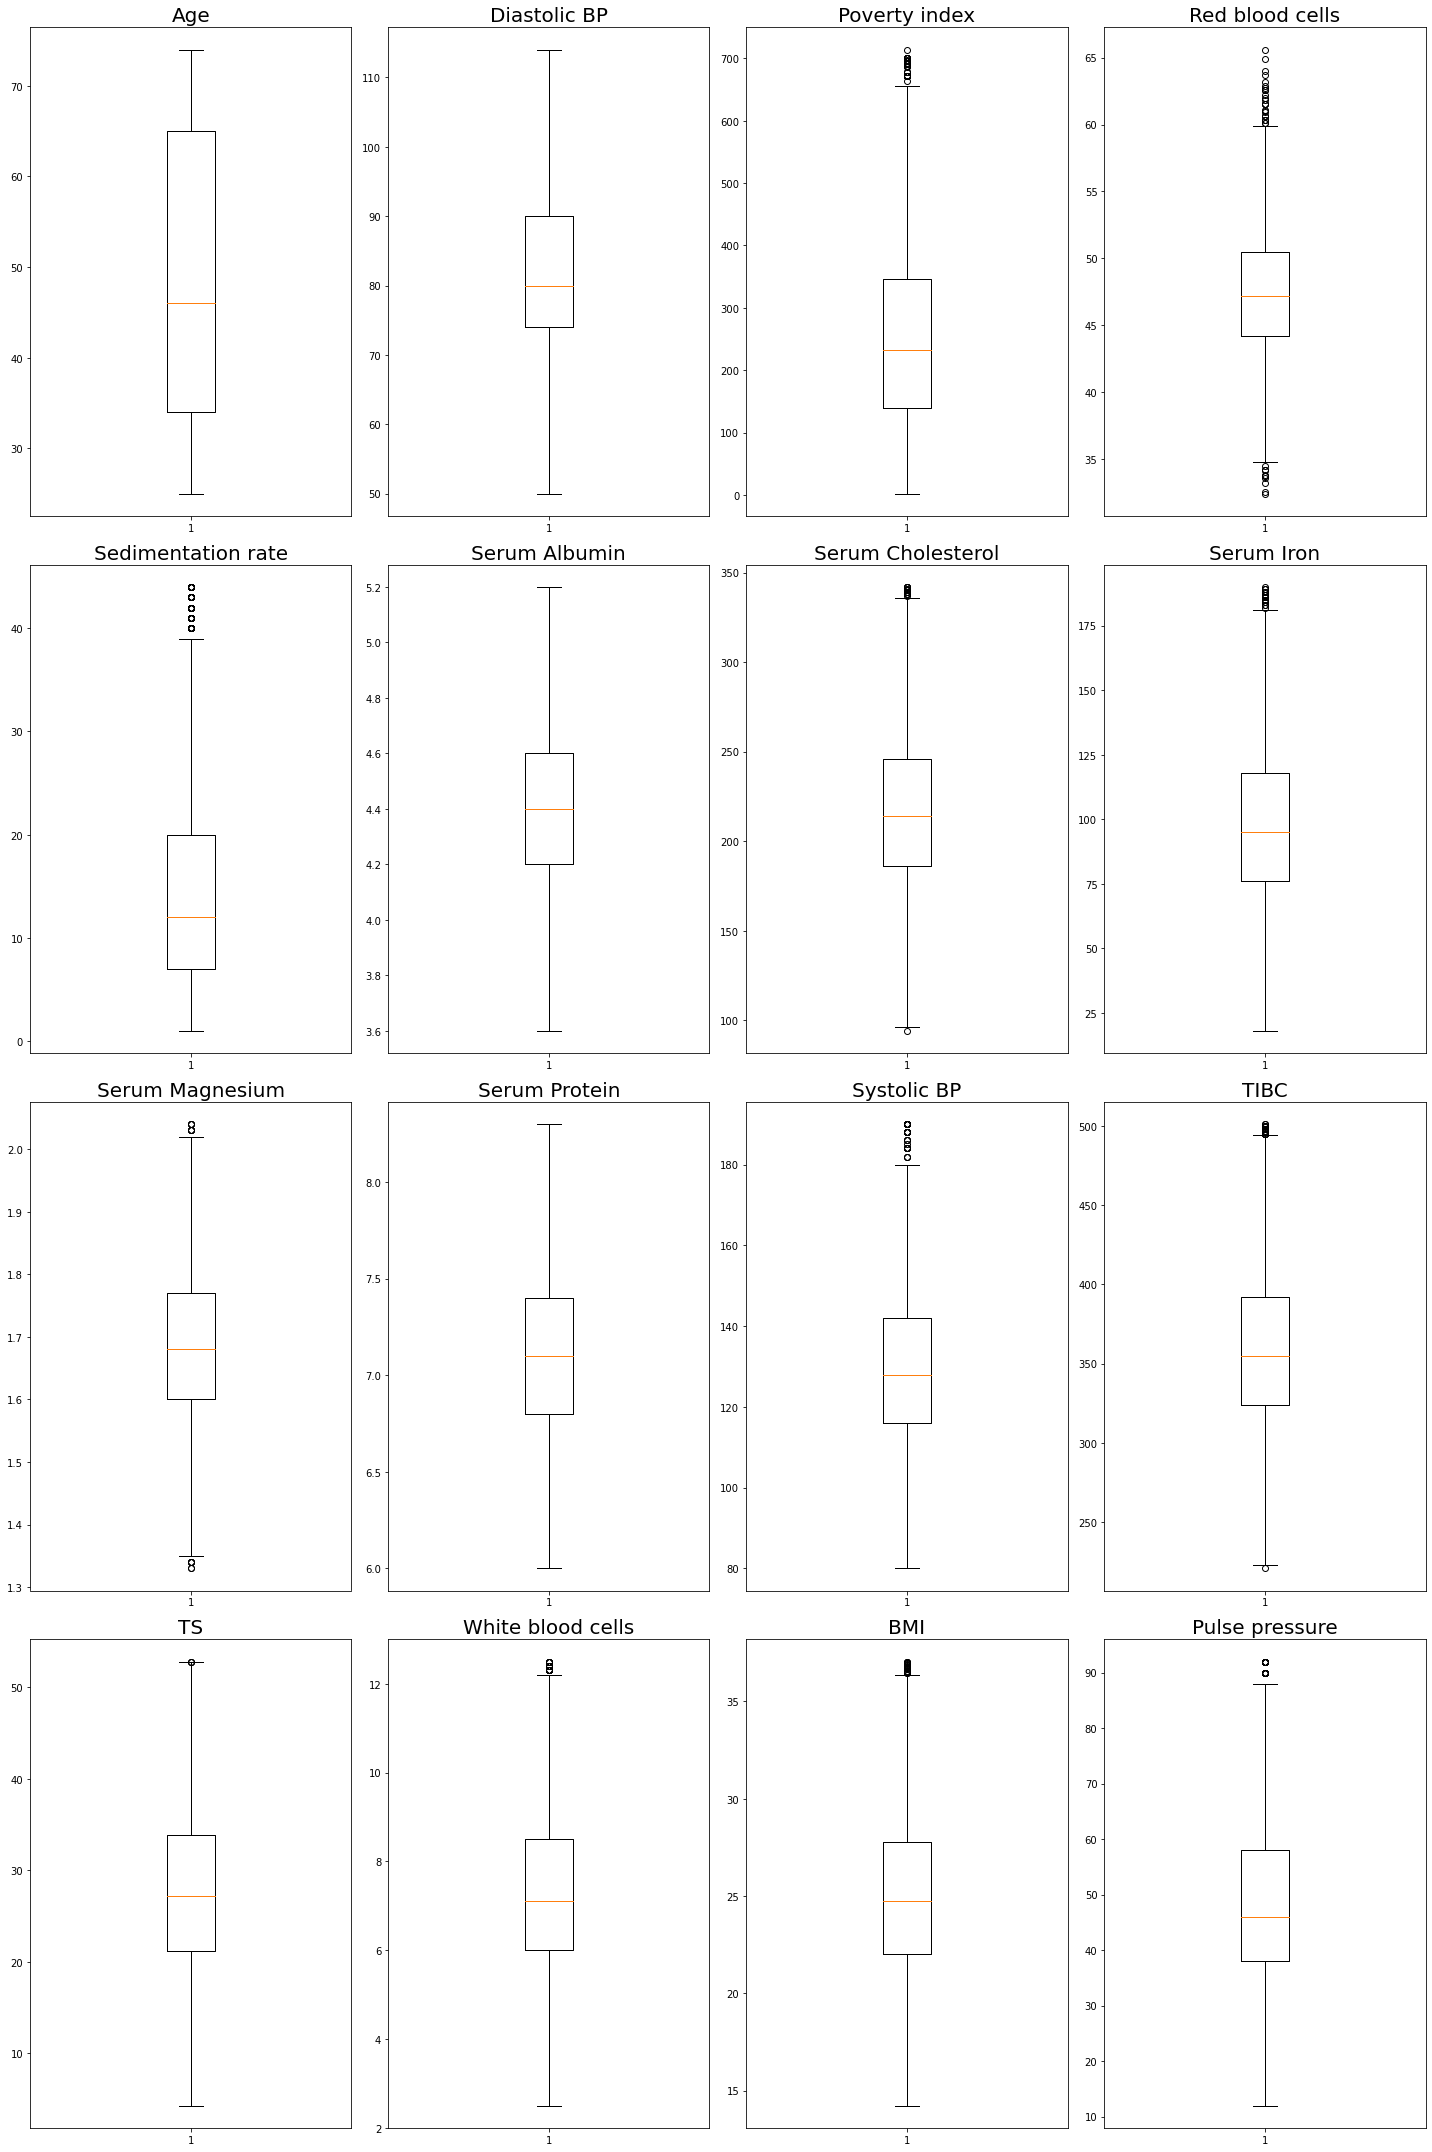

In [13]:
# Plotting box plot for each feature individually after applying the IQR method

# Create the subplots
fig, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(20, 30))

# Iterate over the features and create subplots
for i, feature in enumerate(quantitative_features):
    # Calculate the subplot position
    row = i // NUM_ROWS
    col = i % NUM_COLS
    axes[row, col].boxplot(df[feature])
    axes[row, col].set_title(feature, fontsize="20")

# Adjust the spacing between subplots
fig.tight_layout()


## Features Transformations

Feature transformations refer to the process of modifying or manipulating the features (variables) in a dataset to improve their representation, extract meaningful information, or meet certain assumptions required by a particular analysis or model.

Feature transformations can take various forms depending on the nature of the data and the objectives of the analysis. Here are a few common types of feature transformations:

- Scaling/Normalization
- Logarithmic Transformation
- Square Root Transformation
- Power Transformations


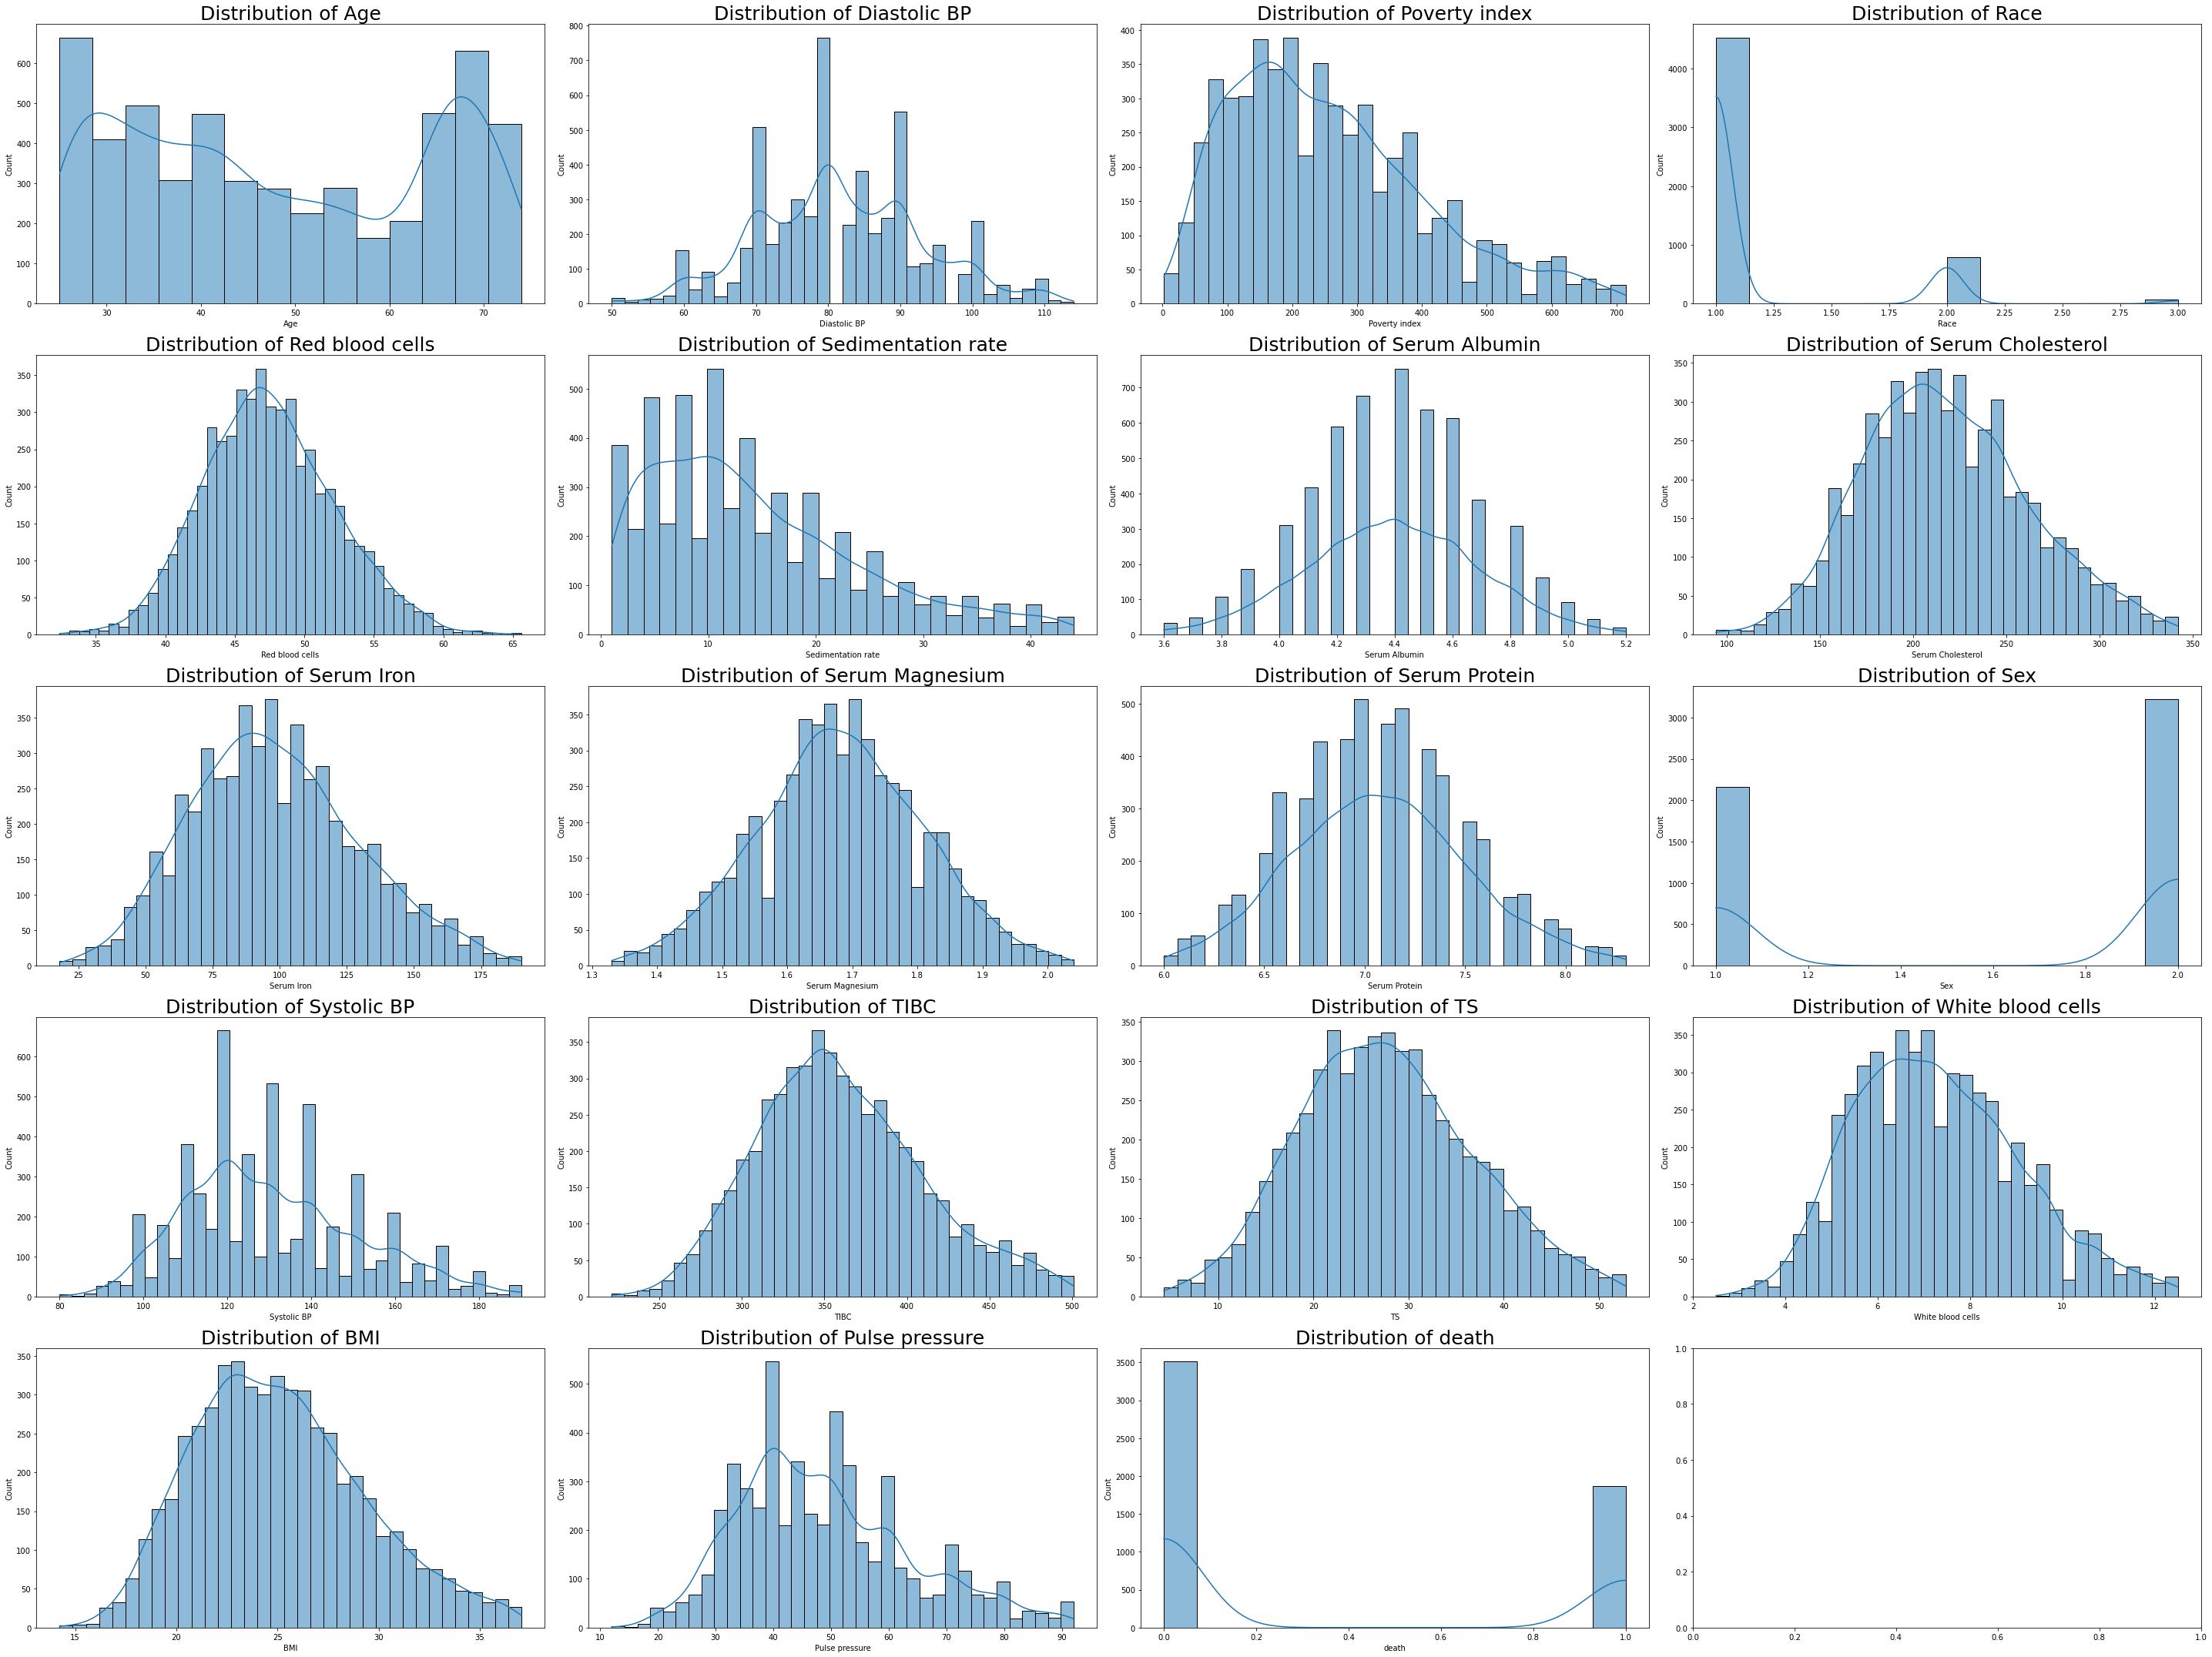

In [14]:
# Let's visualize our features distribution
def plot_dist(row, col, data, Transform=[]):
    fig, ax = plt.subplots(row, col, figsize=(40, 30))
    for i, feature in enumerate(data.columns):
        row = i // NUM_ROWS
        col = i % NUM_COLS
        if len(Transform) == 0:
            sns.histplot(df[feature], kde=True, ax=ax[row, col])
        else:
            sns.histplot(df[feature].agg(Transform),
                         kde=True, ax=ax[row, col])

        ax[row, col].set_title(f"Distribution of {feature}", fontsize="25")

    fig.tight_layout()
    plt.show()


# First, we will visualize the features distribution without any transformations
plot_dist(5, 4, df)


From the previous distributions we notice the following:

- Age, Diastolic Bp, Systolic Bp, Pulse Pressure: Distribution type is unknown.
- Poverty Index, White Blood Cells, BMI: These variables appear to have a right-skewed normal distribution.
- Sex, Race: These are categorical features.
- The remaining variables appear to follow a normal distribution, but further verification will be conducted later.


### Square Root & Logarithmic Transformations


**Square Root Transformation**
The square root transformation involves taking the square root of each value in a dataset. Mathematically, for a variable $Y$, the square root transformation is represented as $Y_{\text{sqrt}} = \sqrt{Y}$.  
The square root transformation is often used to address positive skewness in data or to stabilize the variance. By taking the square root of the values, it compresses larger values and spreads out smaller values, resulting in a more symmetrical distribution. This transformation is particularly useful when the relationship between the variable and the target is approximately proportional or when the variable has a right-skewed distribution.

**Logarthmic Logarithmic (Log) Transformation**
The logarithmic transformation involves taking the logarithm of each value in a dataset. The most common logarithmic bases used are the natural logarithm (base $e$) and the common logarithm (base $10$). Mathematically, for a variable $Y$, the logarithmic transformation is represented as $Y_{\text{log}} = \log(Y)$.  
The log transformation is often used to handle positive skewness or to compress the range of values. It is particularly helpful when dealing with data that spans several orders of magnitude or when the relationship between the variable and the target is multiplicative. By taking the logarithm, the data is transformed into a more symmetrical distribution, which can make it easier to analyze and model. It can also help linearize the relationship between variables that exhibit exponential or power-law relationships.


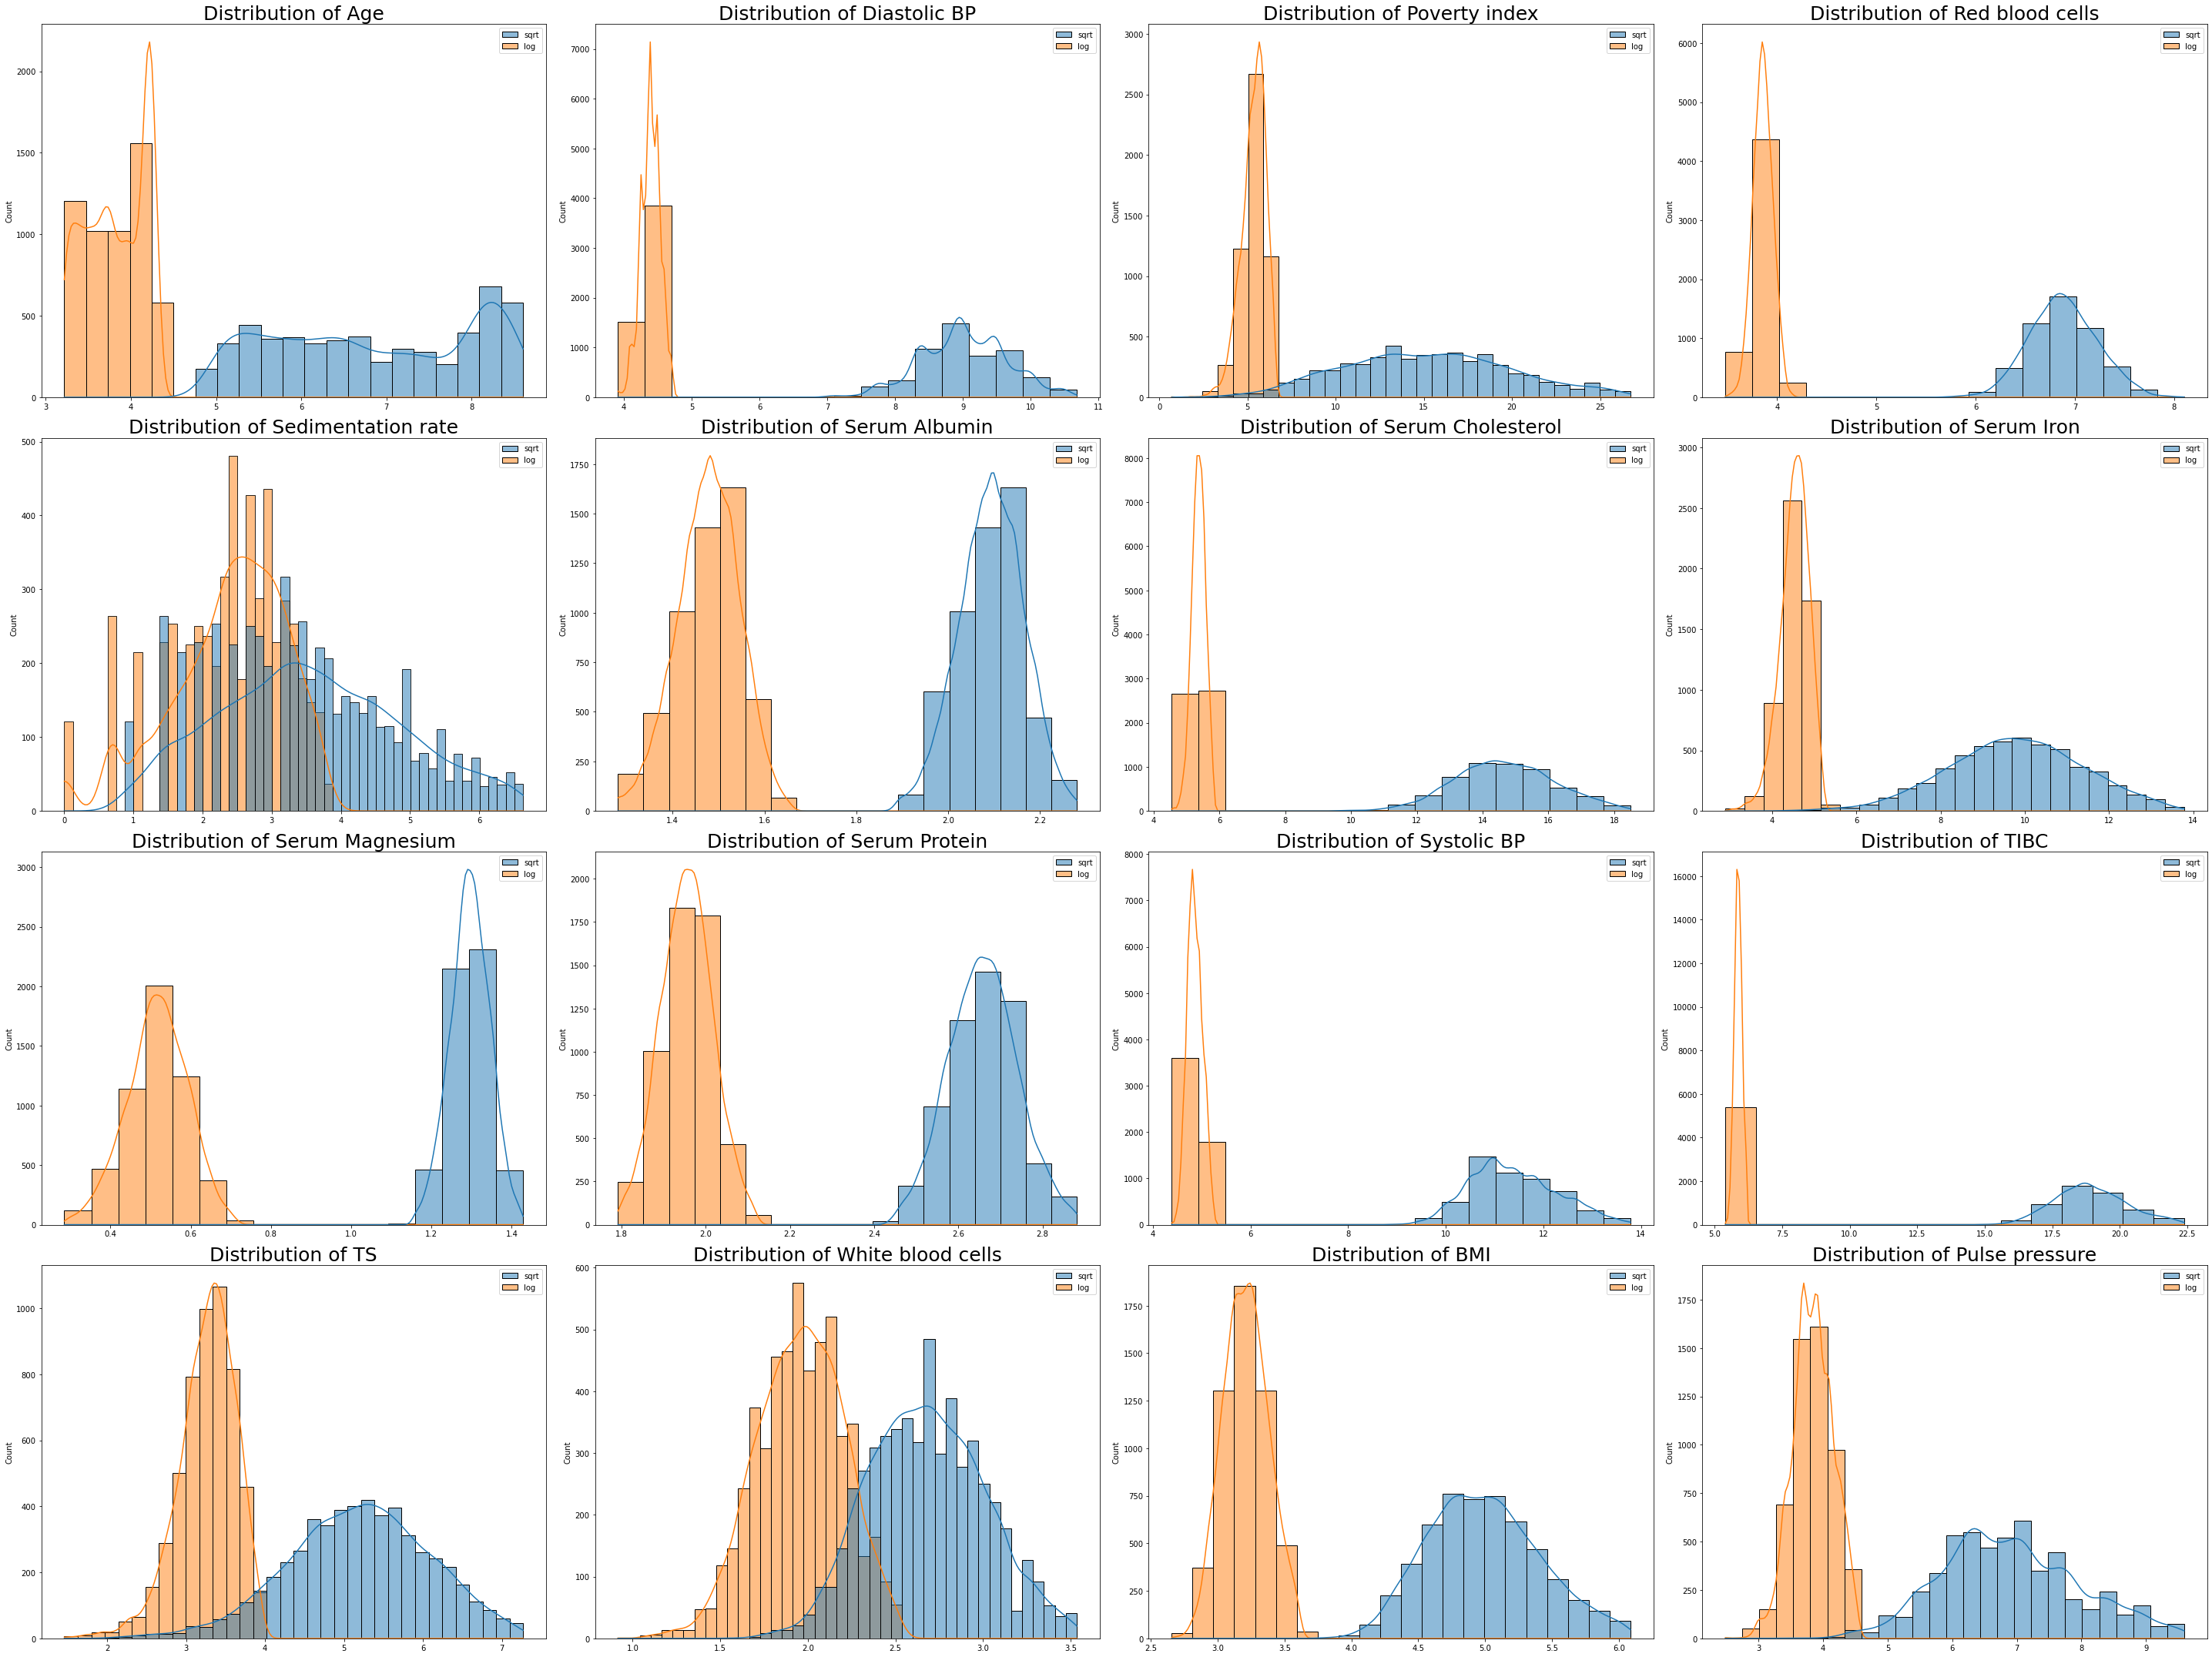

In [15]:
# Let's visualize the square root transformation vs logarithmic transformation
plot_dist(4, 4, df[quantitative_features], Transform=["sqrt", "log"])


### Box-Cox Transformation

The Box-Cox transformation is defined by the following formula:

$$
Y(\lambda) =
\begin{cases}
\frac{{Y^\lambda - 1}}{{\lambda}}, & \text{if } \lambda \neq 0 \\
\log(Y), & \text{if } \lambda = 0 \\
\end{cases}
$$

In this formula, $Y$ represents the original variable, and $\lambda$ is the transformation parameter.
The parameter \lambda determines the type and strength of the transformation as following:

- When $\lambda = 0$: The natural logarithm transformation ($log(Y)$) is applied.
- When $\lambda = 1$: No transformation is applied, and the variable remains unchanged.
- When $\lambda > 0$: Positive values of $\lambda$ indicate a power transformation, where larger values result in stronger transformations. A value of $\lambda$ close to $1$ indicates a mild transformation, while larger values deviate further from the identity transformation.
- When $\lambda < 0$: Negative values of $\lambda$ indicate a reciprocal transformation.
  The goal of the Box-Cox transformation is to find the optimal $\lambda$ value that maximizes the normality of the transformed variable. This is typically achieved by maximizing the log-likelihood function.


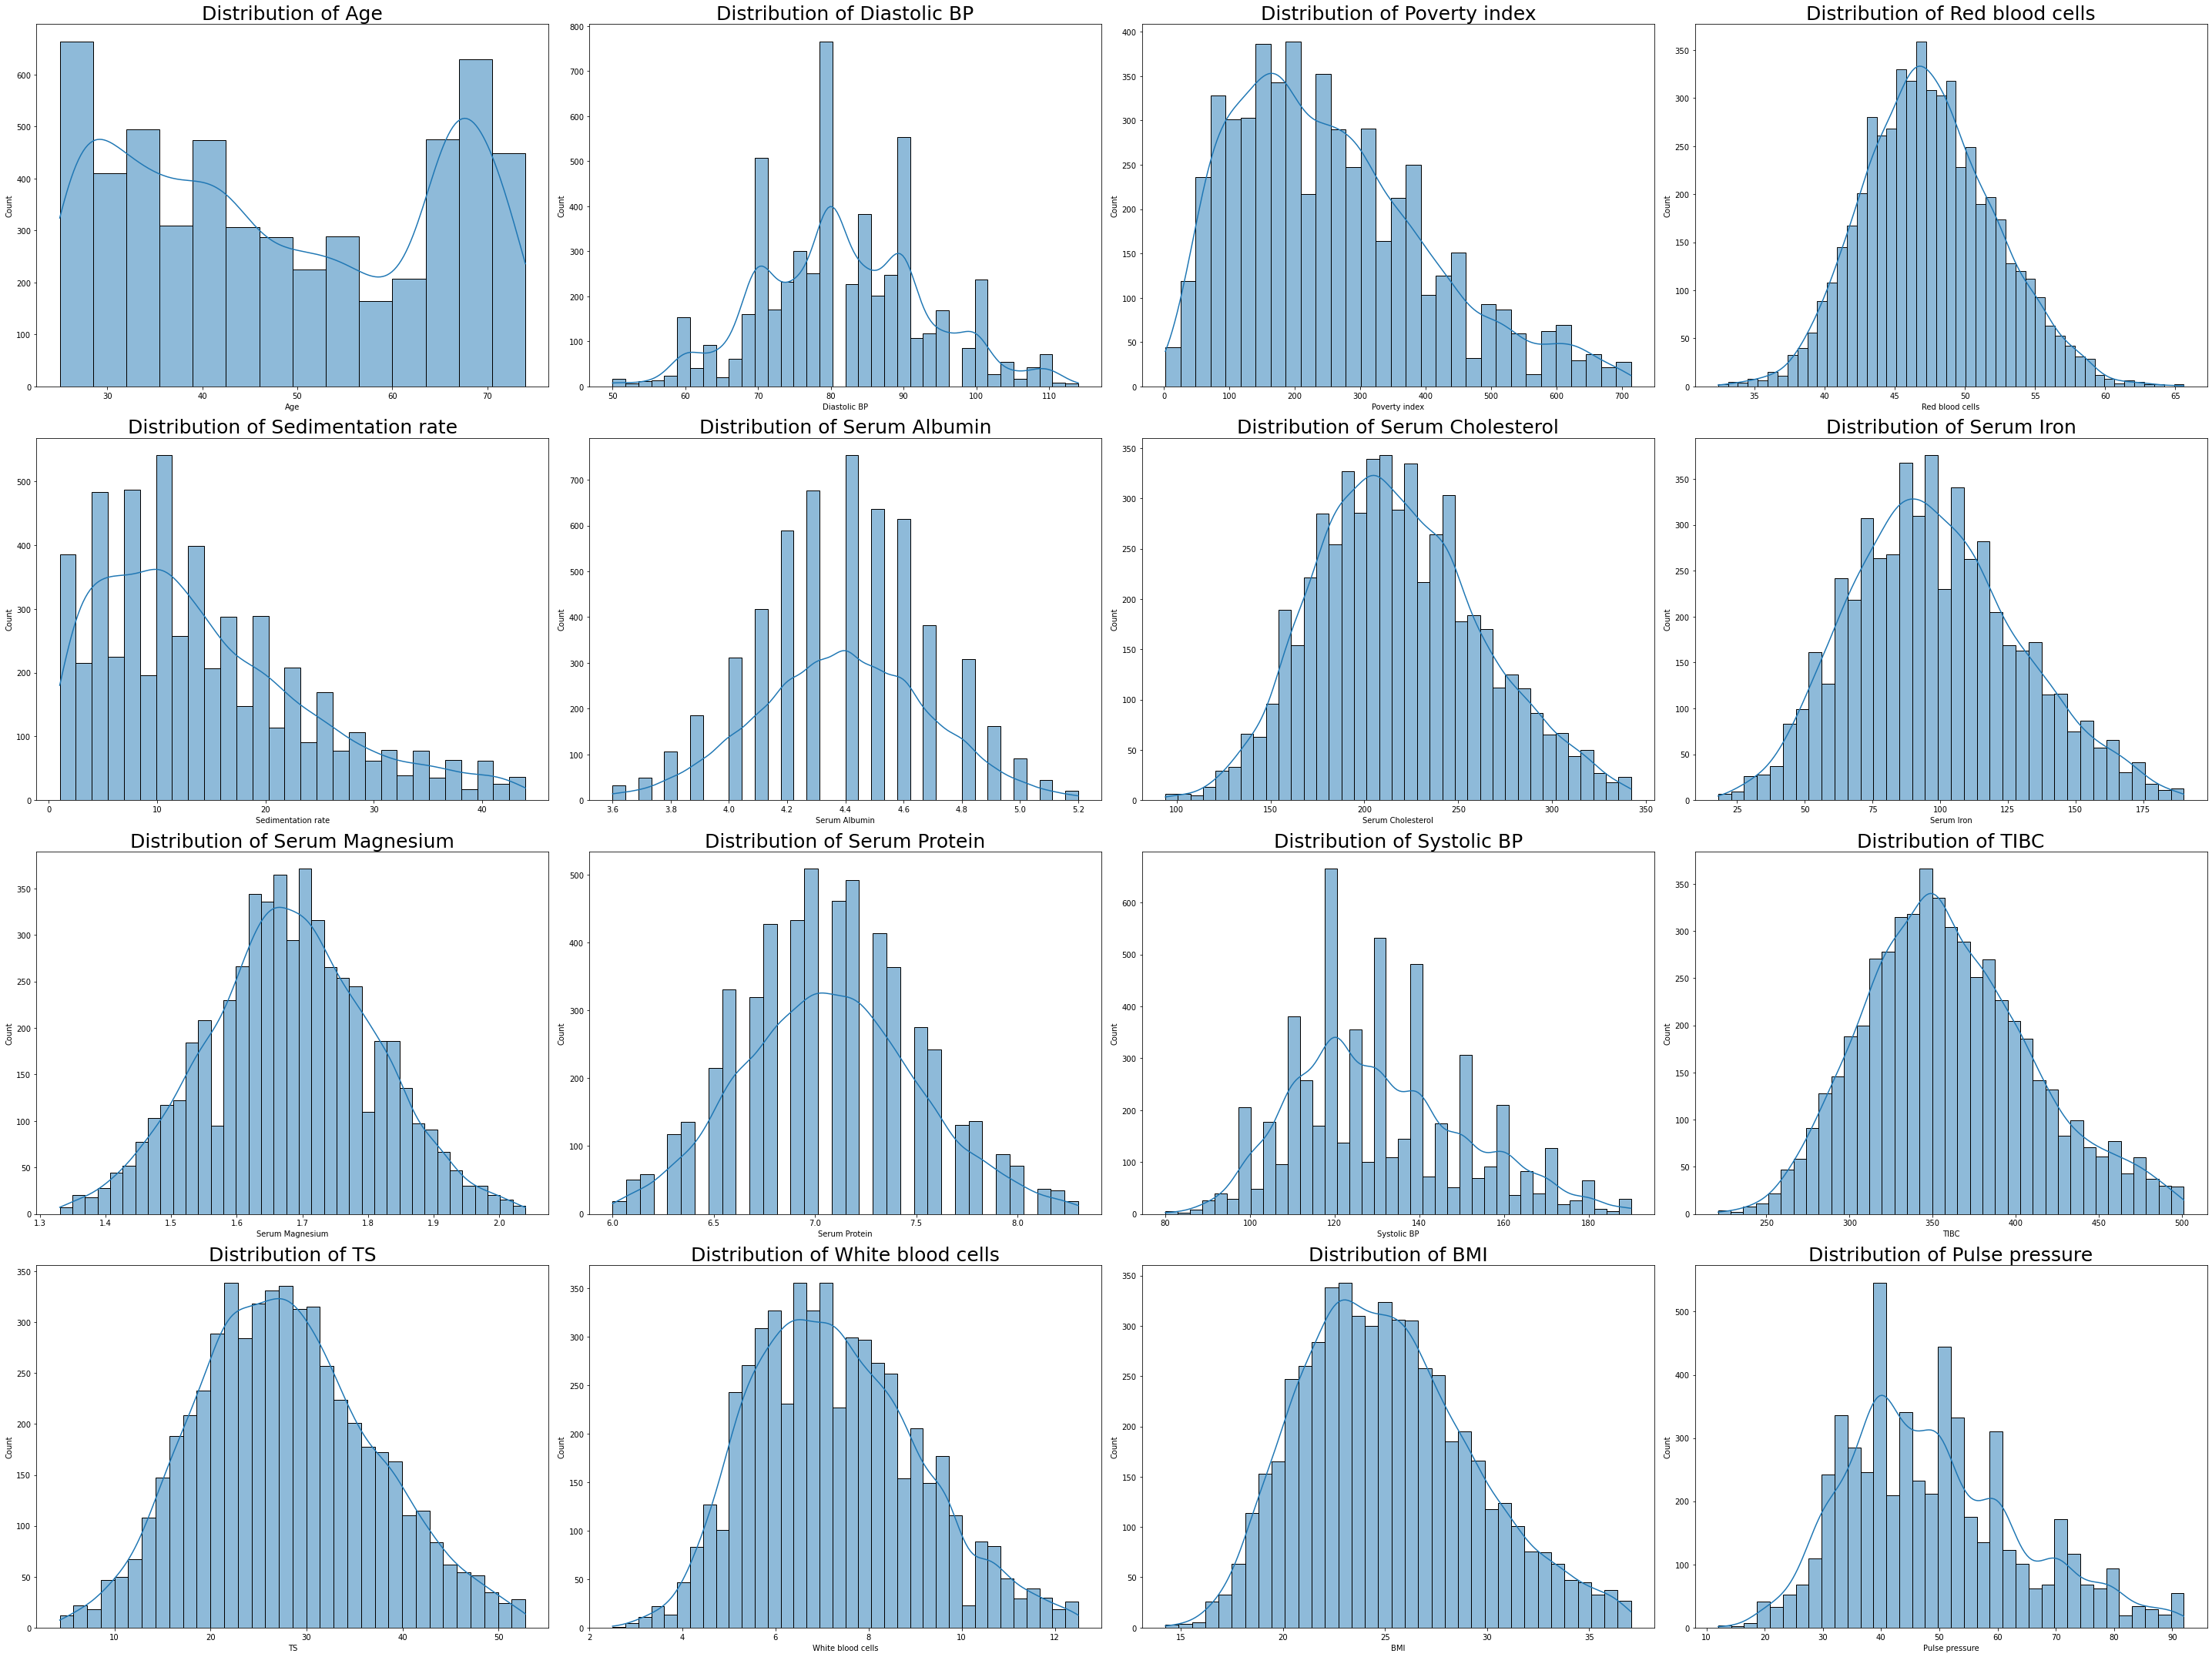

In [16]:
# First, we define our Box-Cox transformation function
def boxcox_transform(data):
    trans, _ = boxcox(data)
    return trans


# Let's copy our original DF, and apply Box-Cox transformation to the new DF
boxcox_df = df.copy(deep=True)
for feature in quantitative_features:
    boxcox_feature = boxcox_transform(df[feature])
    boxcox_df[feature] = boxcox_feature

# Take a look at the quantitative features distributions of the Box-Cox transformed data
plot_dist(4, 4, boxcox_df[quantitative_features])


The Box-Cox Transformation has yielded a satisfactory visual approximation of a normal distribution, affirming its effectiveness. Therefore, we will proceed with utilizing the transformed features.


## Visualizing Categorical Data


In [17]:
# Let's take a look at our categorical features first
boxcox_df[categorical_features].head()


Race  Sex  death
545   2.0  2.0    1.0
547   2.0  2.0    1.0
548   2.0  1.0    0.0
550   2.0  2.0    0.0
552   1.0  2.0    0.0

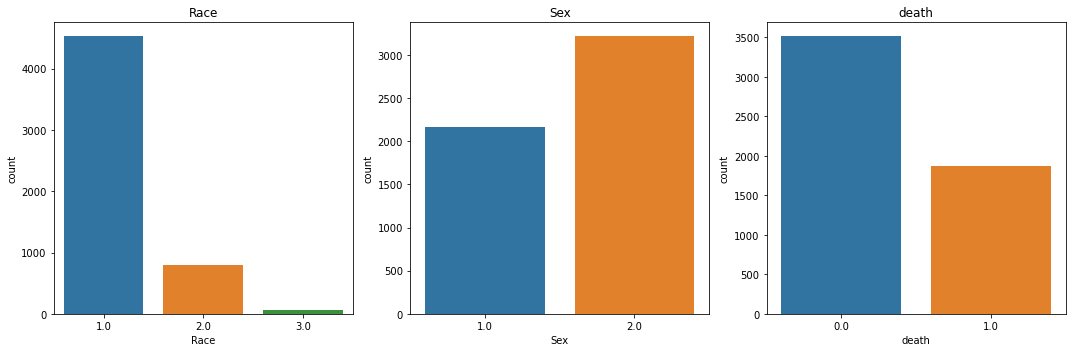

In [18]:
# Now, let's visualize the distributions of our categorical features

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(
    categorical_features), figsize=(15, 5))

# Iterate over each categorical feature and plot the countplot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)

# Adjust the layout and spacing between subplots and display the plot
plt.tight_layout()
plt.show()


## Calculating the Measures Of Central Tendancy and Dispersion

**Measures of Central Tendency**
Measures of central tendency provide information about the central or typical value of a dataset. They help us understand the central concentration or average value around which the data points tend to cluster. The commonly used measures of central tendency are:

1. **Mean**: The mean is the sum of all values divided by the total number of values in the dataset. It represents the arithmetic average of the data.
2. **Median**: The median is the middle value in a sorted dataset. It divides the data into two equal halves, with 50% of the values above and 50% below it.
3. **Mode**: The mode represents the value(s) that occur most frequently in the dataset. A dataset can have one or more modes, or it may have no mode if no value is repeated.

**Measures of Dispersion (Variability)**
Measures of dispersion provide information about the spread, variability, or dispersion of data points around the central tendency. They quantify how the data points are scattered or spread out from the average. The commonly used measures of dispersion are:

1. **Range**: The range is the difference between the maximum and minimum values in a dataset. It provides a simple measure of the total spread of the data.
2. **Variance**: The variance measures the average squared deviation of each data point from the mean. It provides a measure of the overall dispersion of the data.
3. **Standard Deviation**: The standard deviation is the square root of the variance. It represents the average distance between each data point and the mean. It is widely used due to its intuitive interpretation and compatibility with the units of the original data.
4. **Interquartile Range (IQR)**: The IQR is the range between the 25th and 75th percentiles of the dataset. It measures the spread of the middle 50% of the data and is less affected by extreme values than the range.


In [19]:
# Let's have summary statistic about our Box-Cox transformed data
disc = boxcox_df.describe()
disc


Age  Diastolic BP  Poverty index         Race  Red blood cells  \
count  5384.000000   5384.000000    5384.000000  5384.000000      5384.000000   
mean      8.952745     21.778062      19.744257     1.171062         6.464346   
std       1.534053      1.983321       5.695996     0.407858         0.258175   
min       6.455890     15.825606       0.800095     1.000000         5.523133   
25%       7.609171     20.476726      15.778364     1.000000         6.288502   
50%       8.886755     21.539725      19.955079     1.000000         6.458033   
75%      10.546131     23.243277      23.876263     1.000000         6.635405   
max      11.228807     27.049004      32.808171     3.000000         7.350761   

       Sedimentation rate  Serum Albumin  Serum Cholesterol   Serum Iron  \
count         5384.000000    5384.000000        5384.000000  5384.000000   
mean             3.987047       3.750688          22.316061    26.406975   
std              1.839072       0.347005           2.240542     5.685689   
min              0.000000       2.829415          14.737637     8.178013   
25%              2.797466       3.524685          20.769396    22.528184   
50%              3.977324       3.758926          22.252486    26.152807   
75%              5.322908       3.994325          23.821001    30.195462   
max              7.939940       4.707030          27.940557    41.267149   

       Serum Magnesium  Serum Protein          Sex  Systolic BP         TIBC  \
count      5384.000000    5384.000000  5384.000000  5384.000000  5384.000000   
mean          0.663062       2.015137     1.597883     2.220451     5.351574   
std           0.120478       0.065468     0.490371     0.024423     0.115964   
min           0.325251       1.842137     1.000000     2.138099     4.953312   
25%           0.585446       1.974659     1.000000     2.204022     5.272640   
50%           0.661689       2.020488     2.000000     2.219988     5.348325   
75%           0.747042       2.064477     2.000000     2.236190     5.430192   
max           1.000659       2.186769     2.000000     2.278387     5.631659   

                TS  White blood cells          BMI  Pulse pressure  \
count  5384.000000        5384.000000  5384.000000     5384.000000   
mean     13.324657           2.763455     2.729180        5.711914   
std       3.536027           0.471800     0.119540        0.649528   
min       2.558651           1.069052     2.321031        3.188769   
25%      10.903828           2.439336     2.645313        5.274387   
50%      13.286609           2.751028     2.728999        5.667157   
75%      15.736930           3.103883     2.811677        6.163557   
max      22.123776           3.934029     3.012940        7.220139   

             death  
count  5384.000000  
mean      0.347325  
std       0.476164  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [20]:
def calculate_mode(x):
    # Helper method to calculate the mode of a certain feature
    return x.mode().iat[0]

def calculate_range(y):
    # Helper method to calculate the range of a certain feature
    return y.max() - y.min()

def calculate_IQR(y):
    # Helper method to calculate the IQR of a certain feature
    return y.quantile(0.75) - y.quantile(0.25)


In [21]:
# Let's calculate our measures of central tendency and dispersion
measures = []
for feature in quantitative_features:
    measures.append(boxcox_df[feature].agg(
        ["mean", "median", calculate_mode, "var", "std", calculate_range, calculate_IQR]))

for item in measures:
    item.rename({"calculate_mode": "mode", "var": "variance", "std": "standard deviation",
                "calculate_range": "range", "calculate_IQR": "IQR"}, inplace=True)
    print(item)
    print("--------------------------------")


mean                   8.952745
median                 8.886755
mode                  10.546131
variance               2.353318
standard deviation     1.534053
range                  4.772917
IQR                    2.936959
Name: Age, dtype: float64
--------------------------------
mean                  21.778062
median                21.539725
mode                  21.539725
variance               3.933561
standard deviation     1.983321
range                 11.223399
IQR                    2.766551
Name: Diastolic BP, dtype: float64
--------------------------------
mean                  19.744257
median                19.955079
mode                  21.510369
variance              32.444369
standard deviation     5.695996
range                 32.008077
IQR                    8.097899
Name: Poverty index, dtype: float64
--------------------------------
mean                  6.464346
median                6.458033
mode                  6.435906
variance              0.066654
standard

## Features Standardization


Feature standardization is a preprocessing technique used to transform numerical features in a dataset to a common scale. It aims to ensure that all features contribute equally to the analysis and modeling processes by eliminating or reducing the potential bias introduced by differences in the scales or units of the features.  
We will be using **Standardization (Z-score normalization) method**  
This method transforms each feature to have a mean of 0 and a standard deviation of 1. It is achieved by subtracting the mean of the feature from each value and then dividing by the standard deviation. The formula for standardization is: $X_{\text{std}} = \frac{{X - \mu}}{{\sigma}}$  
Where $X$ represents the original value of the feature, and $\mu$ represents the mean of the feature, and $\sigma$ represents the standard deviation of the feature.


### Standardizing the Transformed Data

In [22]:
# Let's apply the standardization method to our dataframe
standard_df = (boxcox_df[quantitative_features] - disc[quantitative_features].iloc[1, :]
               ) / disc[quantitative_features].iloc[2, :]
# Take a look at the data after standardization
standard_df.head()


Age  Diastolic BP  Poverty index  Red blood cells  \
545  0.020079     -0.120171      -2.304402         0.145336   
547  0.610437      0.054894      -0.800596        -0.884622   
548  1.483692     -0.120171      -1.580777        -0.003111   
550 -0.510027      0.738768       0.202758        -0.088680   
552 -0.304107     -0.565642       0.202758        -1.395850   

     Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
545            1.408720       0.023742           0.284585   -0.895537   
547            0.878106       0.023742           0.734657   -0.044703   
548           -0.499084       0.023742          -1.879487    1.045193   
550           -1.195601       0.023742           0.039622    0.177887   
552            0.564484       2.068353          -0.096904    0.455878   

     Serum Magnesium  Serum Protein  Systolic BP      TIBC        TS  \
545        -0.961797       2.021751    -0.444789  1.903896 -1.442828   
547        -1.041311       1.399674     0.984337  0.111204 -0.119809   
548         1.010789       0.971768     0.644426 -0.882278  1.452263   
550         0.932419      -0.148378    -0.444789  0.839278 -0.207920   
552         0.067500      -0.618300    -0.731346  1.934171 -0.397883   

     White blood cells       BMI  Pulse pressure  
545           0.516890  1.486775       -0.513445  
547          -0.623719  1.768700        1.239914  
548          -2.306050  0.579790        0.921631  
550          -0.623719  0.706977       -1.391574  
552          -0.686985  0.449038       -0.513445

### Standardizing the Original Data

In [23]:
stats = df[quantitative_features].describe()
stats


Age  Diastolic BP  Poverty index  Red blood cells  \
count  5384.000000   5384.000000    5384.000000      5384.000000   
mean     48.320765     81.691679     254.689264        47.489413   
std      15.899117     11.443893     149.687885         4.705737   
min      25.000000     50.000000       2.000000        32.400000   
25%      34.000000     74.000000     140.000000        44.200000   
50%      46.000000     80.000000     233.000000        47.200000   
75%      65.000000     90.000000     347.000000        50.500000   
max      74.000000    114.000000     714.000000        65.600000   

       Sedimentation rate  Serum Albumin  Serum Cholesterol   Serum Iron  \
count         5384.000000    5384.000000        5384.000000  5384.000000   
mean            14.307764       4.391902         217.752303    98.283804   
std              9.841914       0.295683          44.254173    31.123117   
min              1.000000       3.600000          94.000000    18.000000   
25%              7.000000       4.200000         186.000000    76.000000   
50%             12.000000       4.400000         214.000000    95.000000   
75%             20.000000       4.600000         246.000000   118.000000   
max             44.000000       5.200000         342.000000   190.000000   

       Serum Magnesium  Serum Protein  Systolic BP         TIBC           TS  \
count      5384.000000    5384.000000  5384.000000  5384.000000  5384.000000   
mean          1.681909       7.077340   130.502229   360.033247    27.758544   
std           0.126697       0.436487    20.397663    50.703058     9.178221   
min           1.330000       6.000000    80.000000   221.000000     4.300000   
25%           1.600000       6.800000   116.000000   324.000000    21.200000   
50%           1.680000       7.100000   128.000000   355.000000    27.200000   
75%           1.770000       7.400000   142.000000   392.000000    33.800000   
max           2.040000       8.300000   190.000000   501.000000    52.800000   

       White blood cells          BMI  Pulse pressure  
count        5384.000000  5384.000000     5384.000000  
mean            7.293258    25.119266       48.810550  
std             1.787862     4.219595       15.010188  
min             2.500000    14.227712       12.000000  
25%             6.000000    22.021129       38.000000  
50%             7.100000    24.729935       46.000000  
75%             8.500000    27.771702       58.000000  
max            12.500000    37.053958       92.000000

In [24]:
standard_original = (df[quantitative_features] - stats.iloc[1, :])/stats.iloc[2, :]
standard_original


Age  Diastolic BP  Poverty index  Red blood cells  \
545  -0.083072     -0.147824      -1.534455         0.108503   
547   0.545894      0.026942      -0.839676        -0.890278   
548   1.615136     -0.147824      -1.280593        -0.040252   
550  -0.586244      0.726005       0.022118        -0.125254   
552  -0.397554     -0.584738       0.022118        -1.357792   
...        ...           ...            ...              ...   
8573 -1.215210     -0.672121       0.643410         0.724772   
8574 -1.403900     -0.497355       1.578690        -0.189006   
8575  1.300653      0.026942       0.409591         0.108503   
8576 -0.900727     -0.147824      -0.452203        -0.040252   
8578  1.363550     -1.021652      -0.338633         0.278508   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
545             1.594429       0.027388           0.231565   -0.908772   
547             0.781579       0.027388           0.706096   -0.105510   
548            -0.640908       0.027388          -1.732092    1.051186   
550            -1.047333       0.027388          -0.017000    0.119403   
552             0.375154       2.056589          -0.152580    0.408577   
...                  ...            ...                ...         ...   
8573            0.375154       0.365588          -0.376288   -2.226120   
8574           -0.539302       1.041988          -1.824739   -0.266162   
8575            0.375154       1.041988           1.881126   -0.009119   
8576           -0.437696       0.365588          -1.282417   -0.105510   
8578           -0.539302       0.027388          -0.288160    0.826273   

      Serum Magnesium  Serum Protein  Systolic BP      TIBC        TS  \
545         -0.962215       2.113829    -0.514874  2.089948 -1.390089   
547         -1.041144       1.426524     0.955883  0.038790 -0.169809   
548          1.011004       0.968321     0.563681 -0.888176  1.508076   
550          0.932075      -0.177188    -0.514874  0.807974 -0.256972   
552          0.063858      -0.635391    -0.760000  2.129393 -0.442193   
...               ...            ...          ...       ...       ...   
8573        -0.567572       1.884728    -0.809025  0.176848 -2.163659   
8574        -2.304004       0.739219    -1.299278 -0.868453  0.080784   
8575         2.668508      -0.864493    -0.024622 -0.513445  0.167947   
8576        -1.120073      -0.406290    -1.005126  0.413520 -0.311449   
8578         1.800291      -0.635391     0.073429  0.748806  0.374959   

      White blood cells       BMI  Pulse pressure  
545            0.451233  1.582671       -0.586971  
547           -0.667422  1.956085        1.278428  
548           -1.953875  0.507326        0.878700  
550           -0.667422  0.647354       -1.253186  
552           -0.723355  0.366784       -0.586971  
...                 ...       ...             ...  
8573          -0.331825  0.166999       -0.586971  
8574           1.905484 -0.865121       -1.386428  
8575          -0.108094 -0.480861       -0.054000  
8576          -1.058951  0.160777       -1.253186  
8578           0.115637  0.863552        0.878700  

[5384 rows x 16 columns]

## Splitting Data

We will split our dataset into $2$ partitions with $80\%-20\%$ proption:

- The $80\%$ partition is called the training data.
- The $20\%$ partition is called the testing data


In [25]:
for cat in categorical_features:
    standard_df[cat] = boxcox_df[cat]

In [26]:
transformed_data = standard_df.copy(deep=True)
features = transformed_data.drop("death", axis=1)
targets = transformed_data["death"]
print(f"Target features shape: {targets.shape}")
print(f"Features shape: {features.shape}")


Target features shape: (5384,)
Features shape: (5384, 18)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    features, targets,  random_state=0, test_size=0.2)
assert X_train.shape[0] == y_train.shape[0]


## Plotting Conditional Distributions


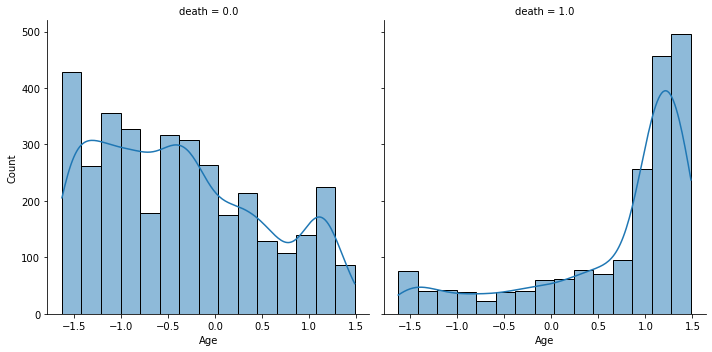

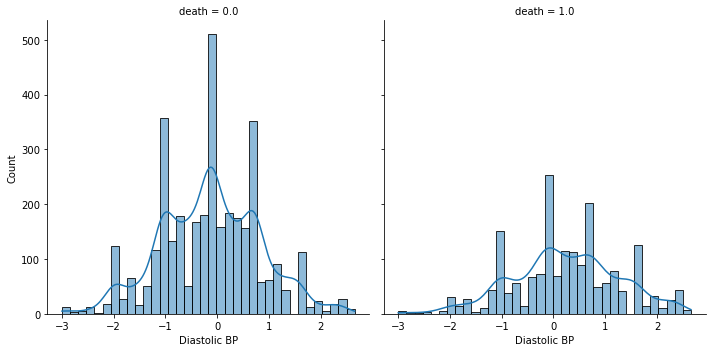

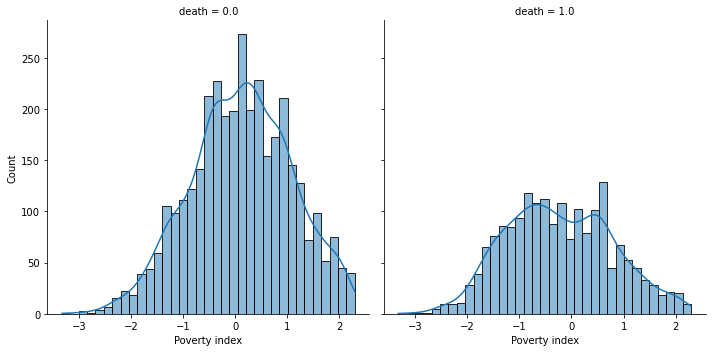

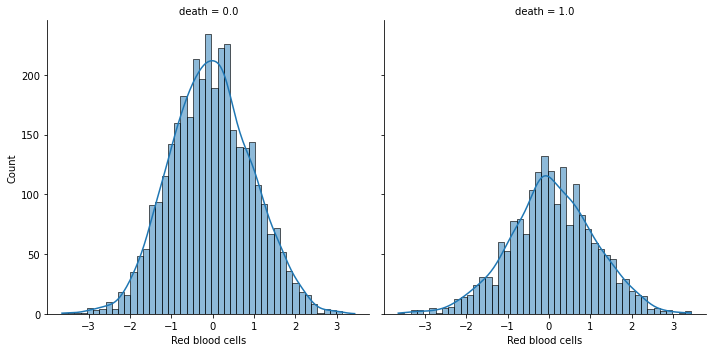

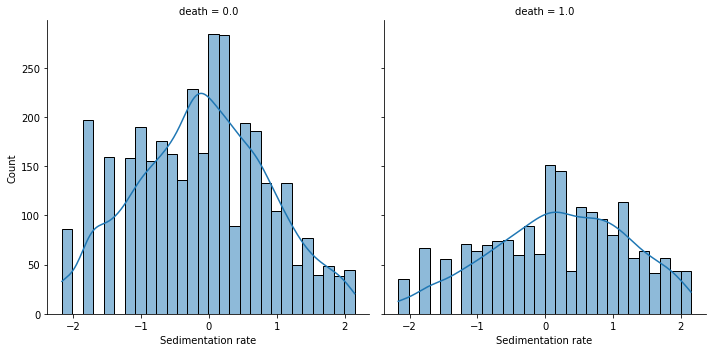

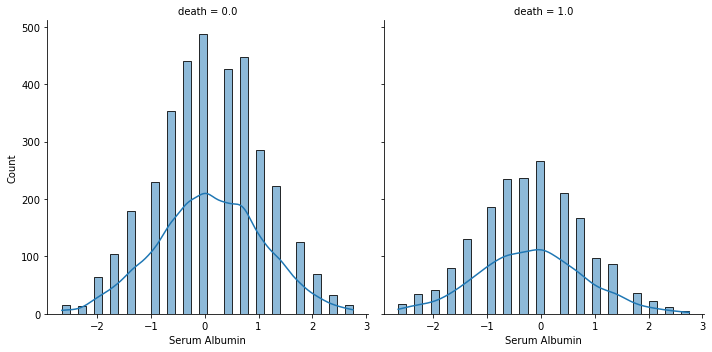

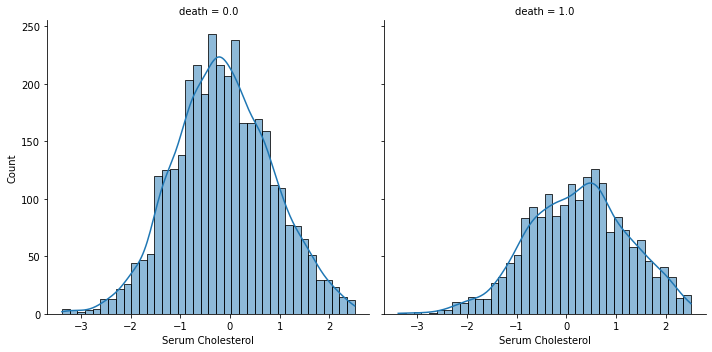

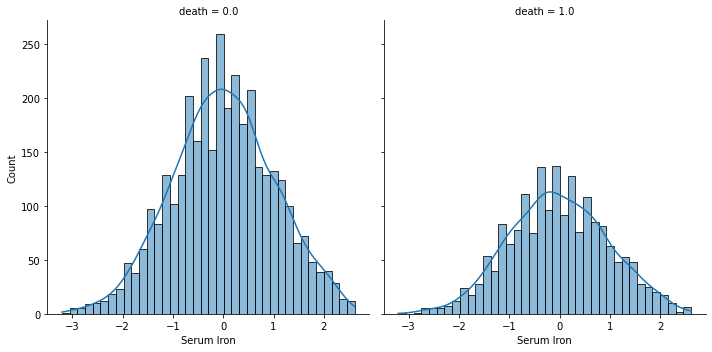

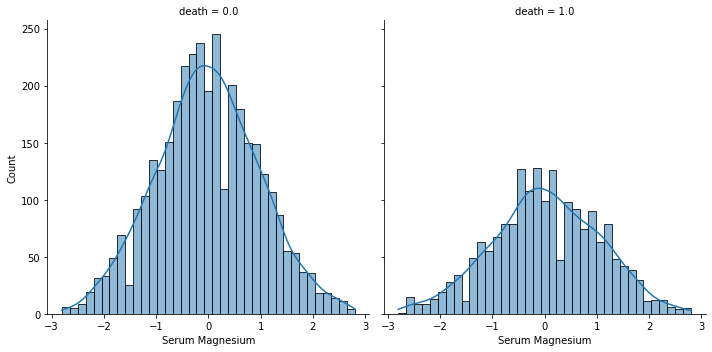

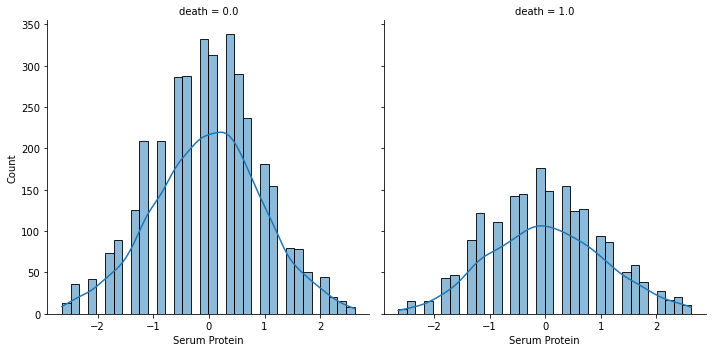

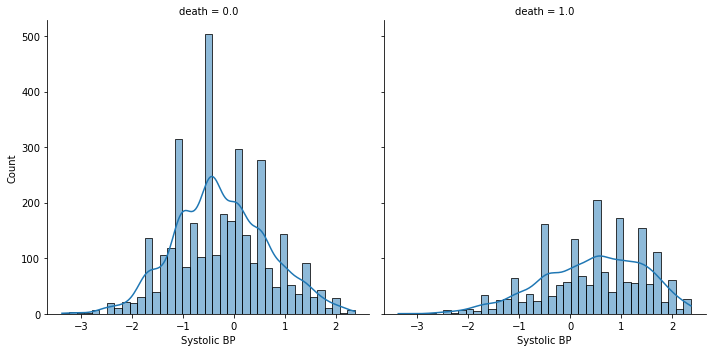

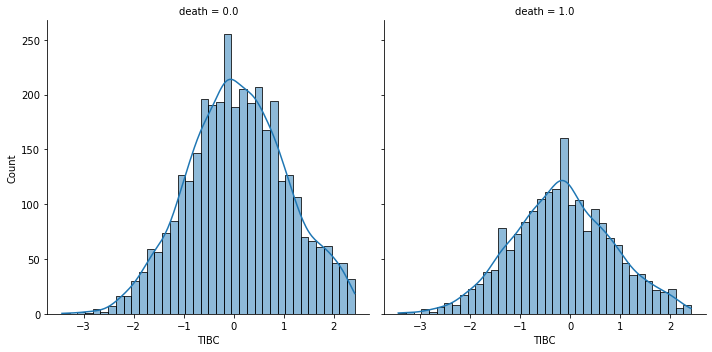

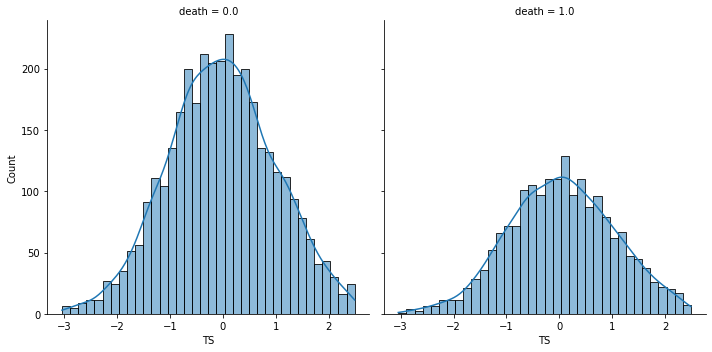

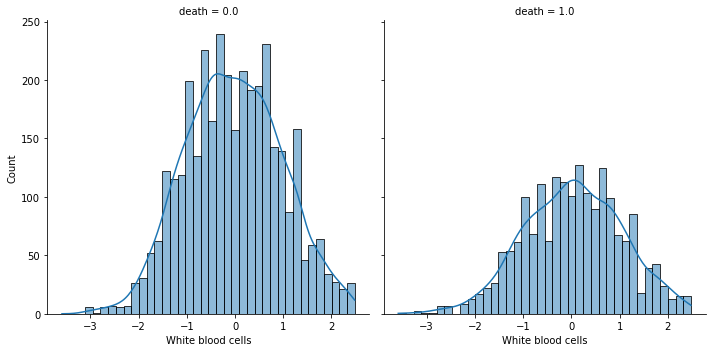

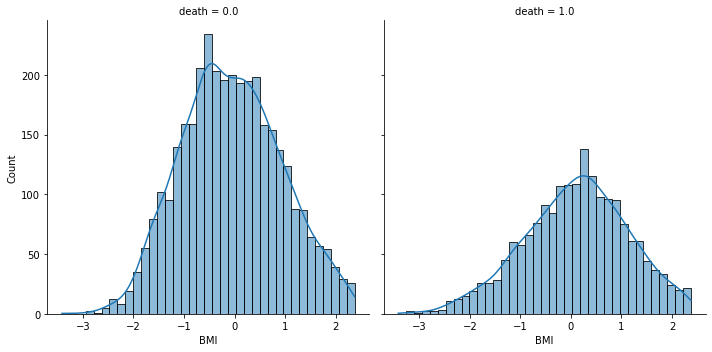

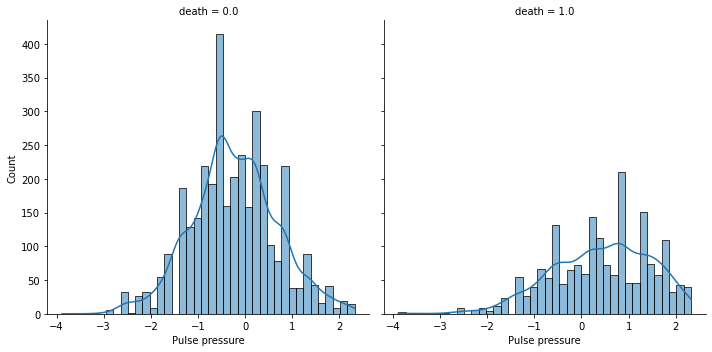

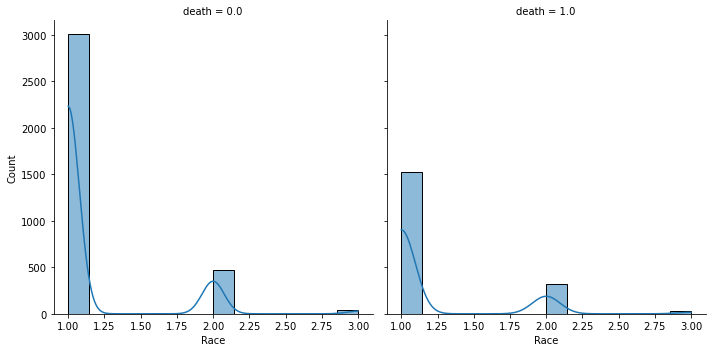

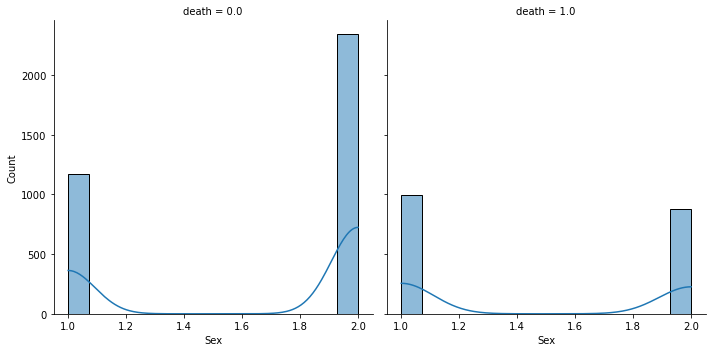

In [28]:
for col in transformed_data.drop("death", axis=1).columns:
    sns.displot(data=transformed_data, x=col, col="death", kde=True)


## Normal Distribution Statistically Testing

### The Shapiro-Wilk test

The Shapiro-Wilk test is a statistical test used to check if a dataset follows a normal distribution. It compares the observed data with the values expected under the assumption of normality.  
The test calculates a test statistic ($W$) that ranges between $0$ and $1$. A value close to $1$ indicates strong conformity to a normal distribution.
The test also provides a p-value, which measures the strength of evidence against the null hypothesis.  
The null hypothesis ($H0$) assumes that the data is normally distributed, while the alternative hypothesis ($H1$) suggests otherwise. By comparing the p-value to a predetermined significance level (e.g., $0.05$), the test determines whether to reject or fail to reject the null hypothesis.


In [29]:
# Let's create our shapiro-wilk test function
def shapiro_test(data):
    lst_stats, p_vals = [], []
    for col in data.columns:
        statistic, p_val = shapiro(data)
        lst_stats.append(statistic)
        p_vals.append(p_val)
    return p_vals, lst_stats


# Let's get the p-values 
p_values, _ = shapiro_test(transformed_data)
print(p_values)



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


d:\Programms\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As we notice, all the p-values of the Shapiro-Wilk test are zeroes, so we will reject the null hypothesis, which means that our features aren't normal due to Shapiro-Wilk test.  
The interpretation of results from the Shapiro-Wilk test is sensitive to departures from normality, including deviations in skewness, kurtosis, or multimodality. If the data exhibits significant deviations from normality in these aspects, it may impact the validity of the test.


### Q-Q Plots

Q-Q plots, or quantile-quantile plots, are used to assess whether a dataset follows a specific theoretical distribution, such as the normal distribution. The plot compares the observed quantiles of the data to the expected quantiles of the theoretical distribution.  
A good fit between the data and the theoretical distribution is indicated by the points on the plot falling approximately along a straight line. Deviations from the straight line suggest departures from the assumed distribution.


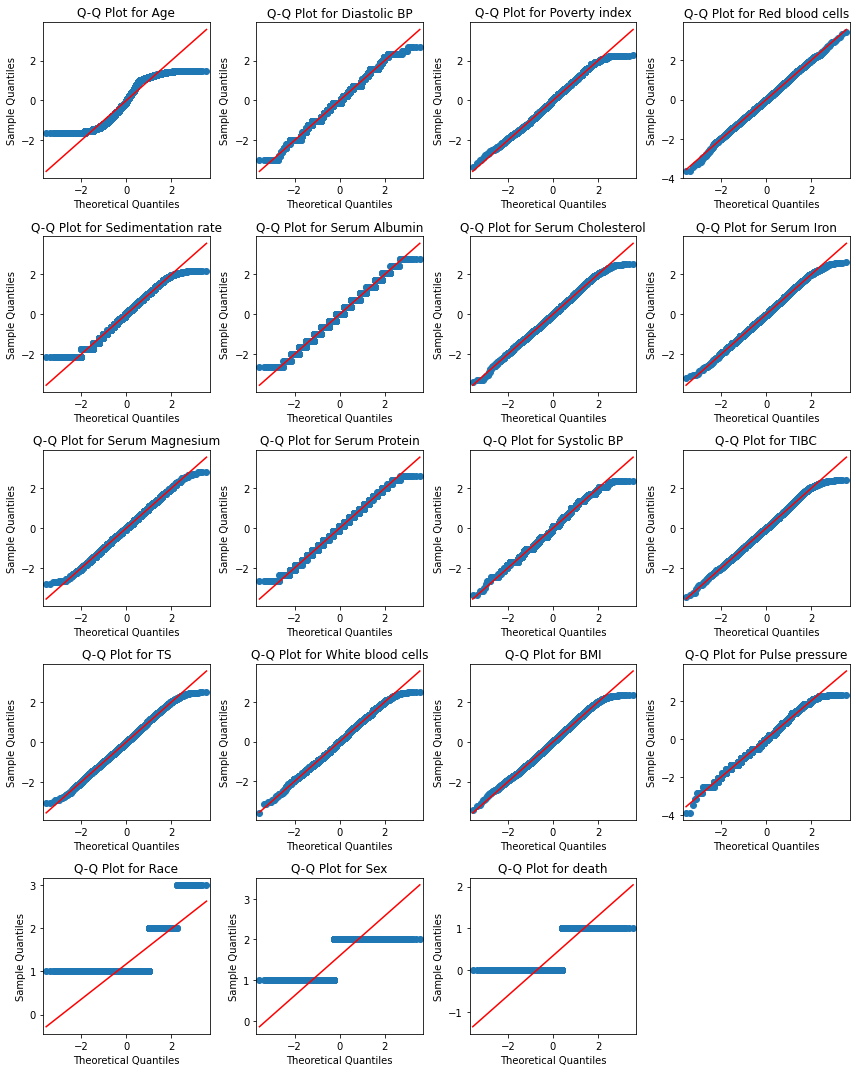

In [30]:
# Let's write the function to plot our Q-Q plots
def QQ(data):
    columns = data.columns
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4))

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3*num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(columns):
        ax = axes[i]
        sm.qqplot(data[feature], line='s', ax=ax)
        ax.set_title(f"Q-Q Plot for {feature}")

    # Remove any remaining empty subplots
    for j in range(num_columns, num_rows*4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


QQ(transformed_data)


### Anderson test

The Anderson-Darling test is a statistical test used to determine whether a given dataset conforms to a specific theoretical distribution, such as the normal distribution. It evaluates the goodness of fit by comparing the observed data to the expected values from the theoretical distribution. The test produces a test statistic called the Anderson-Darling statistic, which quantifies the degree of discrepancy between the observed data and the expected distribution. Higher values of the test statistic indicate a larger deviation from the expected distribution.  
To interpret the Anderson-Darling test, critical values and corresponding significance levels are provided. By comparing the computed test statistic to these critical values, one can assess whether the data significantly deviates from the assumed distribution. Typically, a significance level (e.g., $0.05$) is chosen, and if the resulting p-value is below this threshold, it suggests that the data significantly departs from the expected distribution.  
The assumptions of Anderson-Darling test:

- $H0$: The features are normally distributed.
- $H1$: The features are NOT normally distributed.


In [31]:
# First, let's write the Anderson-Starling test function
def anderson_test(data):
    alpha_list, stats_list, critical_vals_list = [], [], []
    for col in data.columns:
        result = anderson(data[col])
        stats_list.append(result.statistic)
        critical_vals_list.append(result.critical_values)
        alpha_list.append(result.significance_level)
    return alpha_list, stats_list, critical_vals_list


alpha_list, stats_list, critical_vals_list = anderson_test(transformed_data)

critical_to_alpha = dict(
    zip(np.array(critical_vals_list).flatten(), np.array(alpha_list).flatten()))

i = 0
j = 0
for critical_vals, tst_stat, alphas, feature in zip(critical_vals_list, stats_list, alpha_list, transformed_data.columns):
    for critical_val in critical_vals:
        if tst_stat > critical_val:
            i += 1
            print(
                f"Feature {feature} for significance {critical_to_alpha[critical_val]} rejects null hypothesis.")
        else:
            j += 1
            print(
                f"Feature {feature} for significance {critical_to_alpha[critical_val]} fails to reject null hypothesis.")
    print("")


Feature Age for significance 15.0 rejects null hypothesis.
Feature Age for significance 10.0 rejects null hypothesis.
Feature Age for significance 5.0 rejects null hypothesis.
Feature Age for significance 2.5 rejects null hypothesis.
Feature Age for significance 1.0 rejects null hypothesis.

Feature Diastolic BP for significance 15.0 rejects null hypothesis.
Feature Diastolic BP for significance 10.0 rejects null hypothesis.
Feature Diastolic BP for significance 5.0 rejects null hypothesis.
Feature Diastolic BP for significance 2.5 rejects null hypothesis.
Feature Diastolic BP for significance 1.0 rejects null hypothesis.

Feature Poverty index for significance 15.0 rejects null hypothesis.
Feature Poverty index for significance 10.0 rejects null hypothesis.
Feature Poverty index for significance 5.0 rejects null hypothesis.
Feature Poverty index for significance 2.5 rejects null hypothesis.
Feature Poverty index for significance 1.0 rejects null hypothesis.

Feature Red blood cells fo

In [32]:
print(
    f"Number of features rejecting H0 {i}, while number of features failing to reject H0 {j}.")


Number of features rejecting H0 92, while number of features failing to reject H0 3.


## Visualizing Relations Between Features

## Scatter Plots
First of all, we will visualize the relations between variables in scatter plot

Text(0.5, 0.98, 'Scatter Plot of Age vs. Diastolic BP')

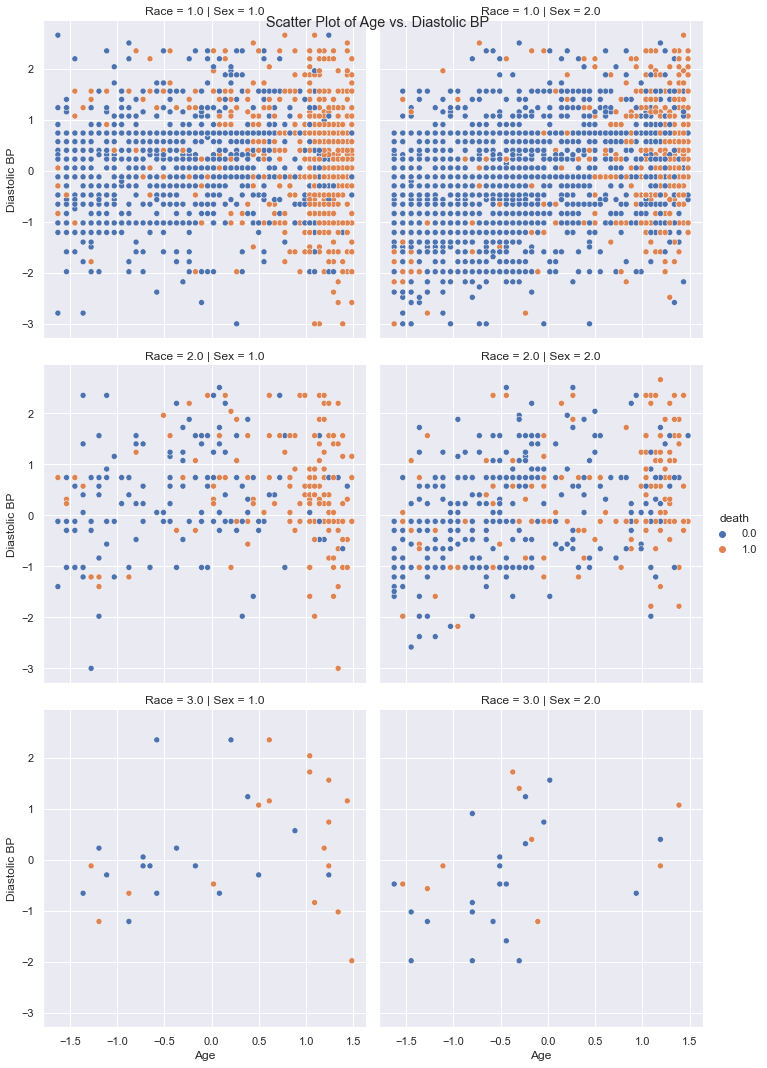

In [33]:
sns.set_theme(style="darkgrid")
plot = sns.relplot(
    data=transformed_data,
    x="Age",
    y="Diastolic BP",
    hue="death",
    col="Sex",
    row="Race"
)
plot.fig.suptitle("Scatter Plot of Age vs. Diastolic BP")


Text(0.5, 0.98, 'Scatter Plot of Age vs. Systolic BP')

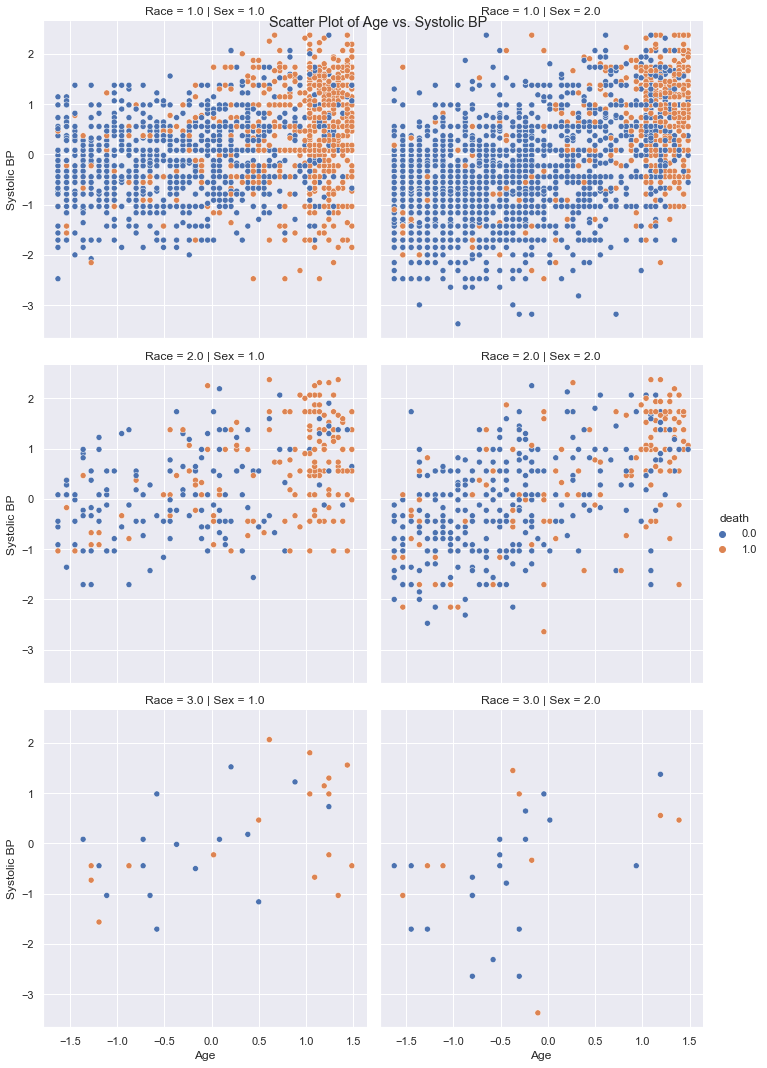

In [34]:
plot = sns.relplot(
    data=transformed_data,
    x="Age",
    y="Systolic BP",
    hue="death",
    col="Sex",
    row="Race"
)
plot.fig.suptitle("Scatter Plot of Age vs. Systolic BP")


### Violin Plots


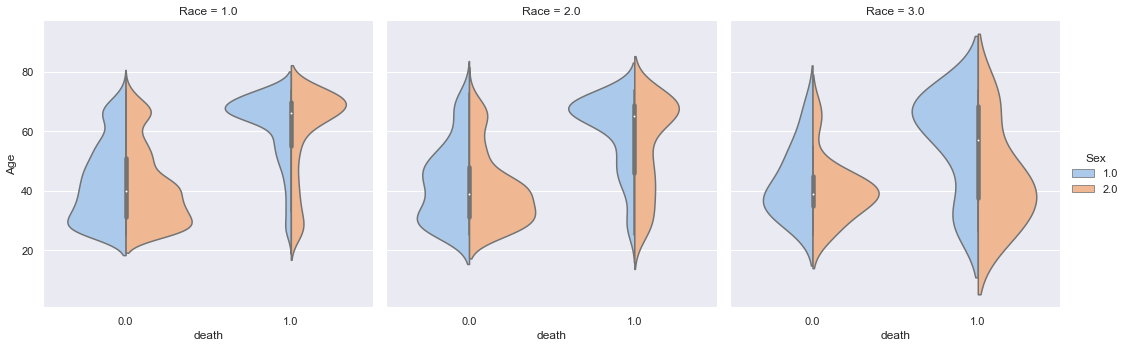

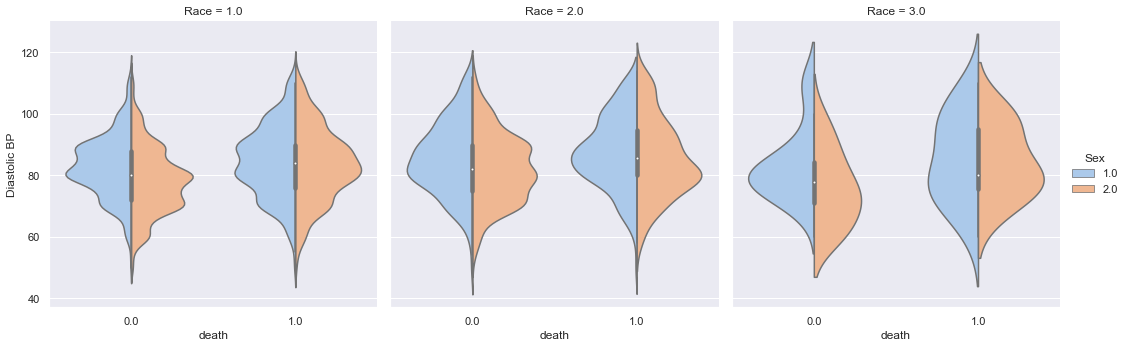

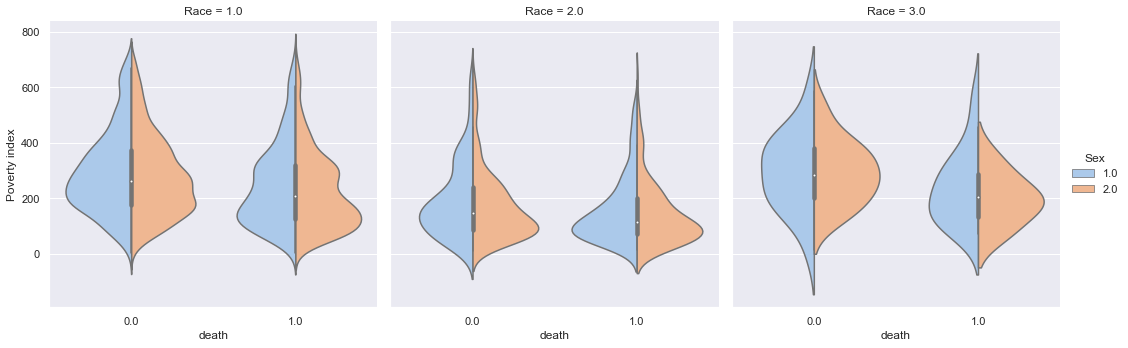

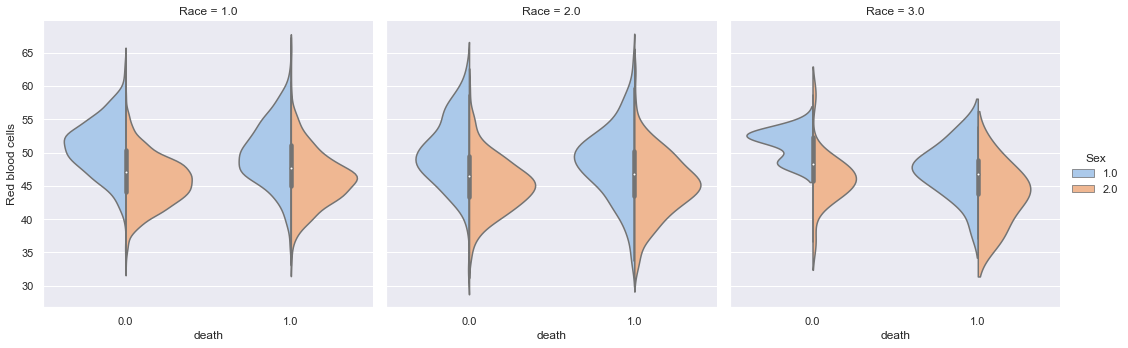

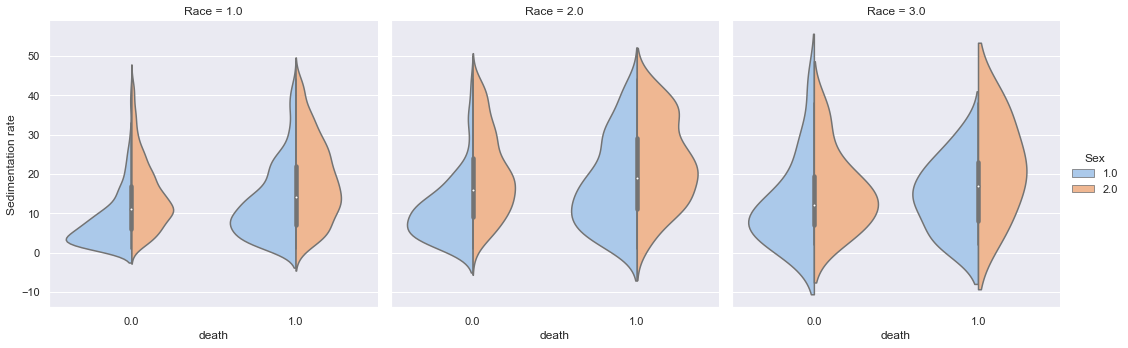

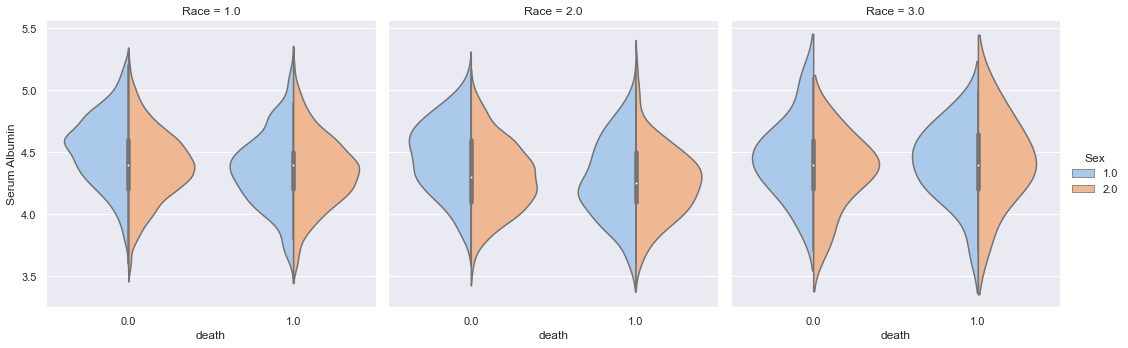

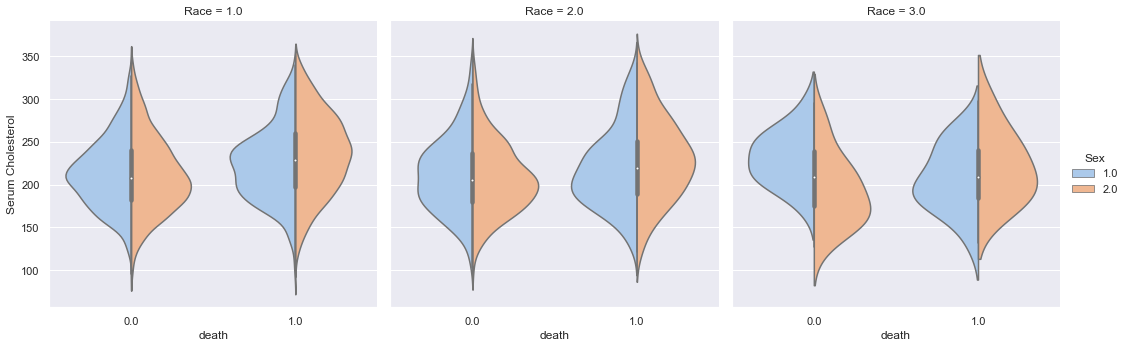

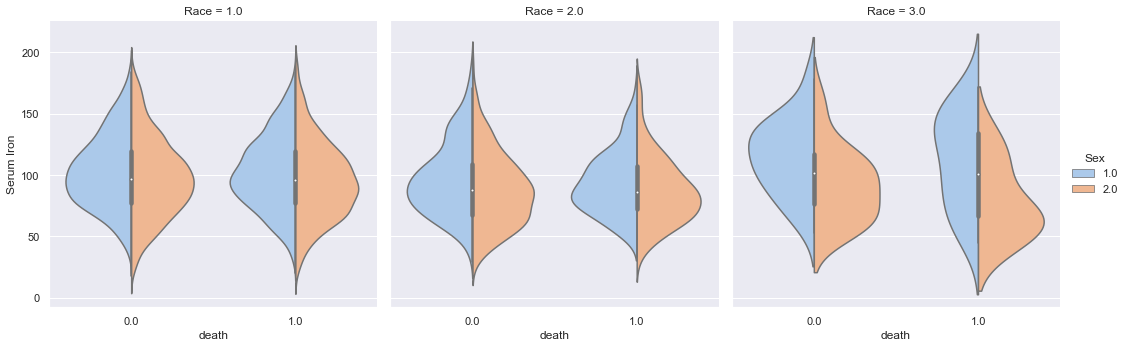

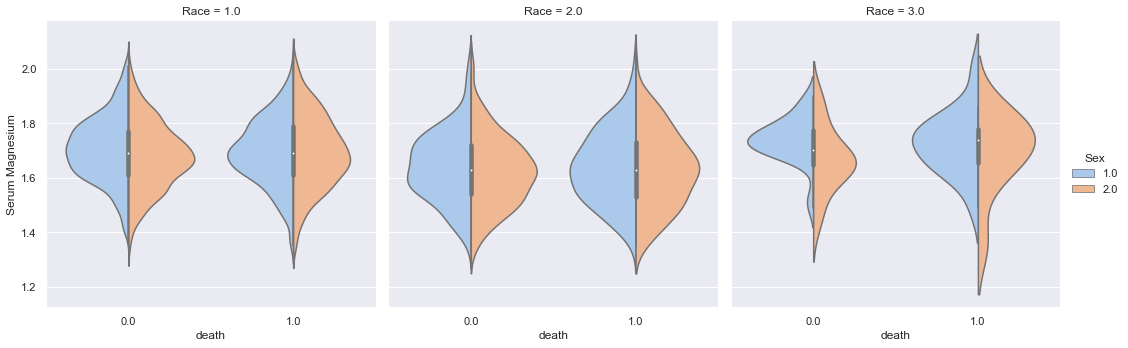

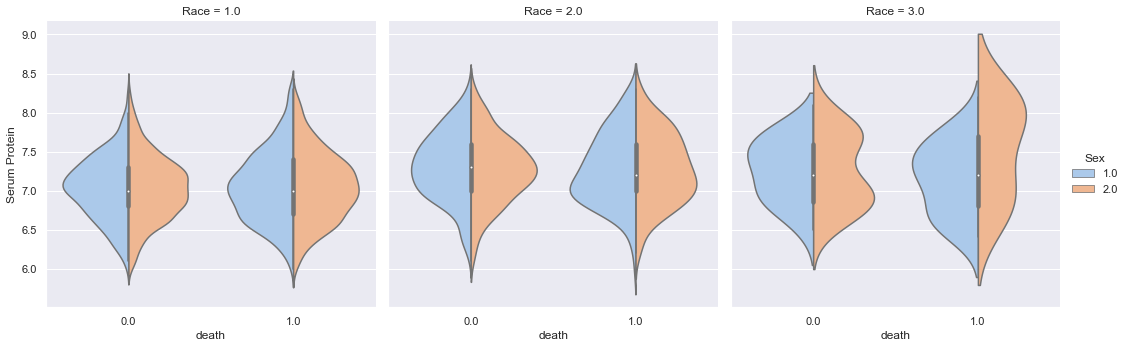

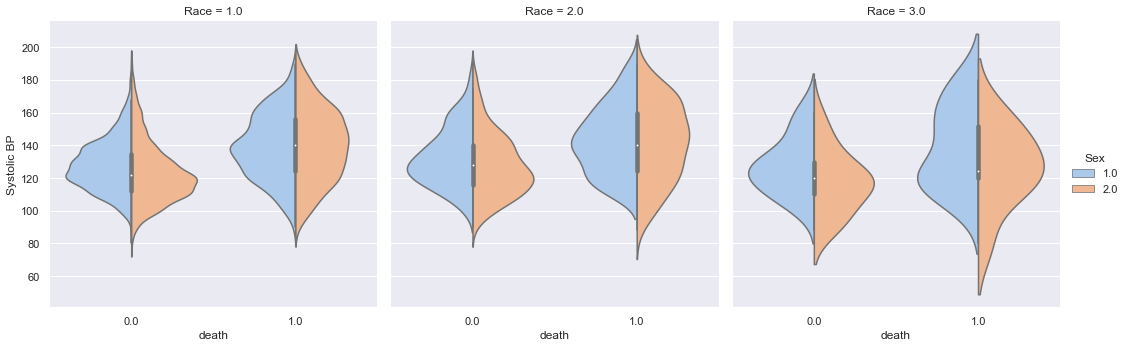

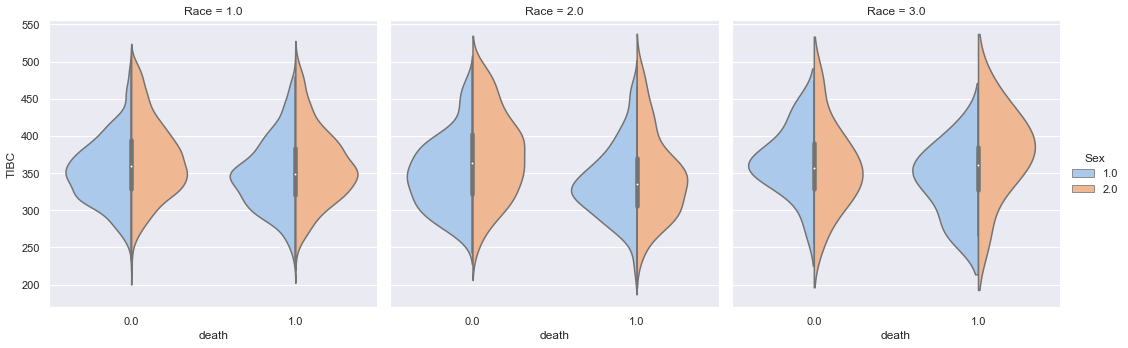

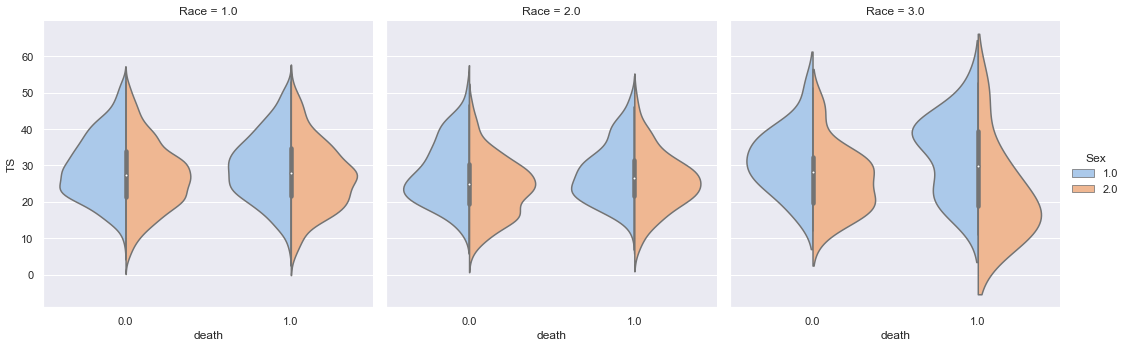

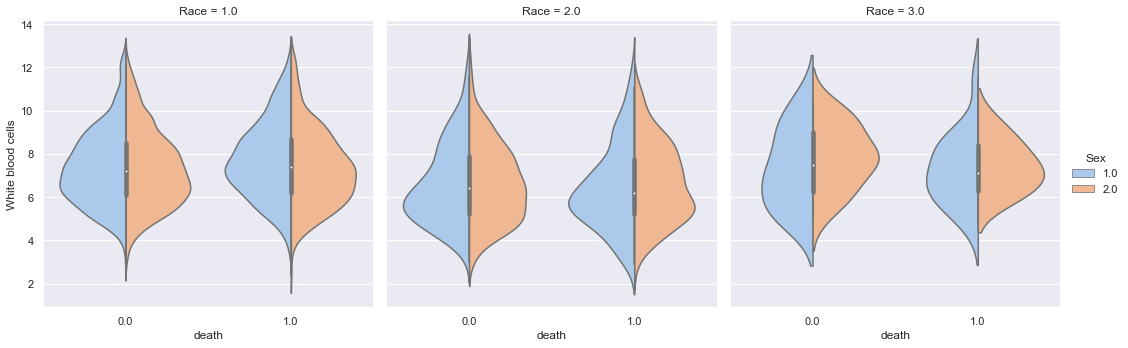

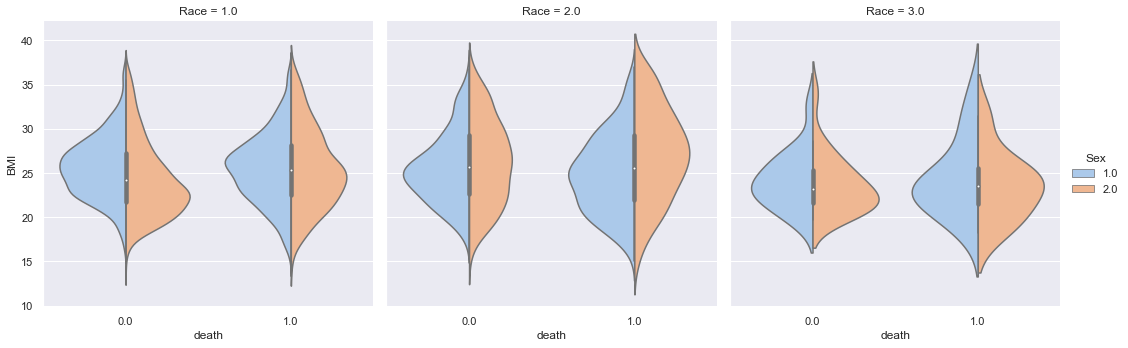

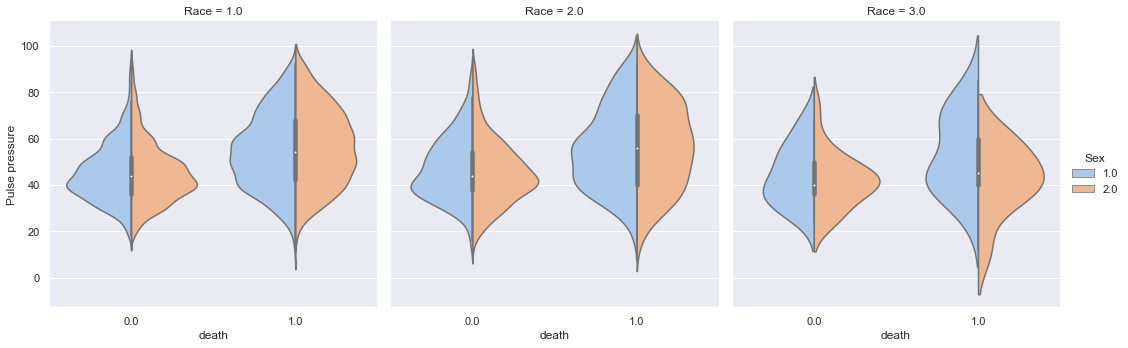

In [35]:
# Now we will make a violin plot for each feature with sex, race, and the risk of death
for feature in features:
    if feature == "Race" or feature == "Sex":
        continue
    g = sns.catplot(data=df, x="death", y=feature, kind="violin",
                    hue="Sex", palette="pastel", split=True, col="Race")


### Visualizing Correlations


<AxesSubplot:>

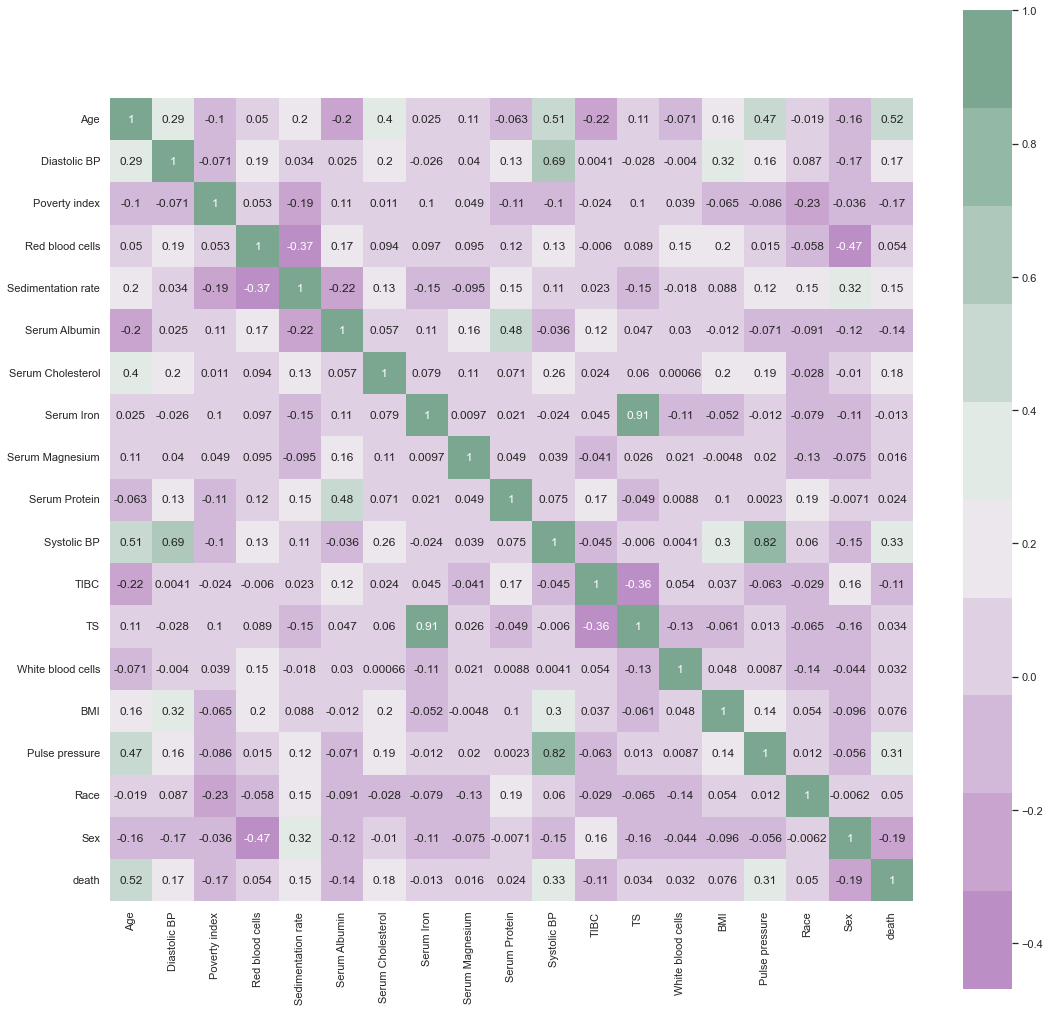

In [36]:
# Let's visualize the correlations between all our features
cmap = sns.diverging_palette(300, 150, s=40, l=65, n=10)
corrmat = transformed_data.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)


## Machine Learning Model


In [37]:
# We will use Gaussian Naive Bayes Classifier, so we will import it first
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, roc_curve


### Naive Bayes Classifier

**The Naive Bayes classifier** is a simple yet effective probabilistic machine learning algorithm used for classification tasks. It is based on Bayes' theorem and makes the assumption of feature independence, which is where the "naive" in its name comes from.
The Naive Bayes classifier is built on **Bayes Theorem**:
$P(y|x) = \frac{P(x|y)P(y)}{P(x)}$, Where:

$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
$$

- $P(x)$: Prior probability of event $x$
- $P(y)$: Prior probability of event $y$
- $P(x|y)$: Probability of event $x$ given event $y$
- $P(y|x)$: Probability of event $y$ given event $x$

Now, let's assume that features are mutually independent (Naive assumption), in our case we get the following equation:
$P(y|\mathbf{X}) = \frac{\prod_{i=1}^{n} P(x_i|y)P(y)}{P(\mathbf{X})}$, where:

- $X$: vector of features $(x_1, x_2, ..., x_n)$
- $x_i$: Individual feature
- $n$: Number of features
- $y$: Event that the person would live in the next 10 years
- $P(X)$: Prior probability of features $X$
- $P(y)$: Prior probability of event $y$
- $P(X|y)$: Probability of features $X$ given event $y$ (LikeHood)
- $P(y|X)$: Probability of event $y$ given features $X$ (Posterior)

Then to select class with highest posterior probability:
$y = \arg\max_y P(y|\mathbf{X}) = \arg\max_y \frac{\prod_{i=1}^{n} P(x_i|y)P(y)}{P(\mathbf{X})}$

Since ${P(X)}$ does not depend on our posterior probability at all we can neglect it.  
$\arg\max_y P(y|\mathbf{X}) = \arg\max_y \left( \prod_{i=1}^{n} P(x_i|y)P(y) \right)$

Since the probabilities calculated by the Naive Bayes classifier are typically between $0$ and $1$, multiplying them together can result in very small numbers. To overcome this issue, a common practice is to apply the logarithm function to transform the multiplication into addition. By taking the logarithm of the probabilities, we can convert the product operation to a summation, which helps avoid numerical underflow. This approach allows for more stable computations and facilitates easier manipulation of probabilities, the formula of this method is given as:  
$y = \arg\max_y \left( \sum_{i=1}^{n} \log(P(x_i|y)) \right) + \log(P(y))$

Finally, We need to calculate the following:

- $P(y)$: Prior probability $\rightarrow$ Frequency of each class
- $P(x_i|y)$: Class conditional probability $\rightarrow$ Model with Gaussian

We will calculate them using the following formula:
$P(x_{i}\mid y) = \frac{1}{\sqrt{2\pi \sigma_y^{2}}} \exp \left(-\frac{(x_{i} -\mu_{y})^2}{2\sigma_y^{2}} \right)$


#### Naive Bayes Classifier from Scratch


In [38]:
# First, let's create our Naive Bayes Classifier from scratch
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)  # 0 or 1
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        for i, c in enumerate(self._classes):
            X_c = X[y == c]
            # Mean of each feature in each class
            self._mean[i, :] = X_c.mean(axis=0)
            self._var[i, :] = X_c.var(axis=0)
            self._priors[i] = X_c.shape[0] / \
                float(n_samples)  # Probability of each class

    def predict(self, X):
        Z = np.array(X)
        y_pred = [self._predict(x) for x in Z]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        for i, c in enumerate(self._classes):  # Calculate posterior for each class
            prior = np.log(self._priors[i])
            posterior = np.sum(np.log(self._pdf(i, x)))  # Gaussian model
            posterior += prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, i, x):
        mean = self._mean[i]
        var = self._var[i]

        numerator = np.exp(-(((x - mean) ** 2) / (2 * var)))
        doneminator = np.sqrt(2 * np.pi * var)
        return numerator / doneminator


In [39]:
# Let's create a function to calculate the accuracy of our NB Classifier
def accuracy(a, b):
    return np.sum(a == b) / len(a)


# Now, let's try our NB Classifier
NB_scratch = NaiveBayes()
NB_scratch.fit(X_train, y_train)
y_pred = NB_scratch.predict(X_test)

# Let's check our model's accuracy
print(f"Naive Bayes accuracy: {accuracy(y_test, y_pred)}")


Naive Bayes accuracy: 0.7780872794800371


#### Built-in Naive Bayes Classifier


Accuracy score for GaussianNB is 0.7780872794800371


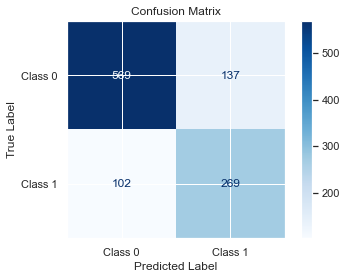

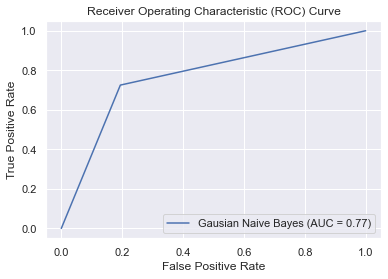

In [40]:
# Let's train our model using Naive Bayes Classifier
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
print(f"Accuracy score for GaussianNB is {accuracy_score(y_test, NB_pred)}")

# Let's plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_test, NB_pred), display_labels=['Class 0', 'Class 1'])

disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Let's plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, NB_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(
    y_test, NB_pred), estimator_name='Gausian Naive Bayes')
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


### Adaboost Classifier

**AdaBoost (Adaptive Boosting)** is a machine learning algorithm used for classification tasks. It combines multiple "weak" classifiers, such as decision stumps, into a single "strong" classifier. Initially, all training examples are assigned equal weights. Weak classifiers are trained sequentially, with weights adjusted to focus on misclassified examples. The final classifier is formed by combining the weak classifiers based on their performance, with more accurate classifiers having higher weights. To classify new instances, the weak classifiers' predictions are combined using their assigned weights. AdaBoost leverages the concept of boosting to iteratively improve its classification accuracy by emphasizing challenging examples. This is how AdaBoost works briefly:

1. Initialization: Each training example, denoted as $(x_i, y_i)$ where $x_i$ is the input features and $y_i$ is the corresponding class label, is assigned an initial weight, $w_i = \frac{1}{n}$, where n is the total number of training examples.
2. Training Weak Classifiers: AdaBoost sequentially trains a series of weak classifiers. Each weak classifier, denoted as $h_t(x)$, is trained on the weighted training data, where the weights represent the importance of each example. The weak classifier aims to minimize the weighted error rate, $Err_t$, defined as the sum of weights of misclassified examples:
   $Err_t = Σ_i(w_i * I(y_i ≠ h_t(x_i)))$
3. Weight Update: Once the weak classifier is trained, its weight, α_t, is calculated based on its performance: $α_t = 0.5 * ln((1 - Err_t) / Err_t)$. The weight $α_t$ measures the contribution of the weak classifier in the final classification. Higher values of $α_t$ are assigned to more accurate classifiers, while lower values are assigned to weaker ones. The weights of the training examples are updated as follows: $w_i ← w_i * exp(-α_t * y_i * h_t(x_i))$. This update increases the weights of the misclassified examples, making them more important for subsequent classifiers to focus on.
4. Combining Classifiers: The final classification is determined by combining the weak classifiers' predictions using their weights. Given a new instance x, the AdaBoost classifier output, H(x), is calculated as: $H(x) = sign(Σ_t(α_t * h_t(x)))$. Here, $sign()$ returns the sign of the sum, indicating the predicted class label ($+1$ or $-1$).


In [41]:
# We will first import the AdaBoost Classifier from scikit-learn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Let's build our classifier
ada_classifier = AdaBoostClassifier()
param_grid = {
    'n_estimators': [30, 31, 32, 33, 34, 35],  # Number of base estimators
    'learning_rate': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Learning rate
}
random_search = RandomizedSearchCV(
    ada_classifier, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'n_estimators': 32, 'learning_rate': 0.4}
Best Score: 0.802877730799184


### Random Forest Classifier Model

**The Random Forest classifier** is a popular machine learning algorithm used for classification tasks. It belongs to the ensemble learning family and combines the predictions of multiple decision trees to make accurate predictions. Here's a brief explanation of how Random Forest works:

1. Random Subsampling: The algorithm starts by creating an ensemble of decision trees. Each tree is trained on a random subset of the training data, sampled with replacement (known as bootstrap aggregating or "bagging"). This creates diverse subsets of data for each tree.
2. Feature Randomness: During the construction of each decision tree, a random subset of features is considered for splitting at each node. This introduces further randomness and helps to reduce correlation among the trees.
3. Decision Tree Construction: Each decision tree is constructed by recursively partitioning the data based on the selected features. The splitting is done based on criteria such as Gini impurity or information gain, aiming to create nodes that best separate the classes.
4. Voting for Classification: Once all the trees are built, to classify a new instance, each tree independently predicts the class label. The final prediction is made by majority voting, where the class that receives the most votes across all trees is chosen as the final predicted class.


In [42]:
# We will import the Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Let's build our model
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_y_pred))


Accuracy: 0.8124419684308264


#### Features Impact on RF Model's Prediction


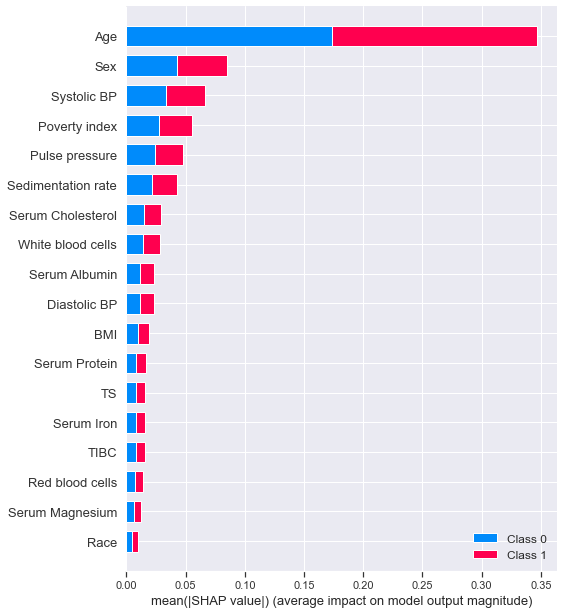

In [43]:
# We will use Shaply to explain how each feature impacts on the prediction of the RF model
import shap

# Create a SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_classifier)
# Generate SHAP values
shap_values = explainer.shap_values(X_test)
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


#### Visualizing the Tree Ensembles


Interactive decision tree saved as: decision_tree.html


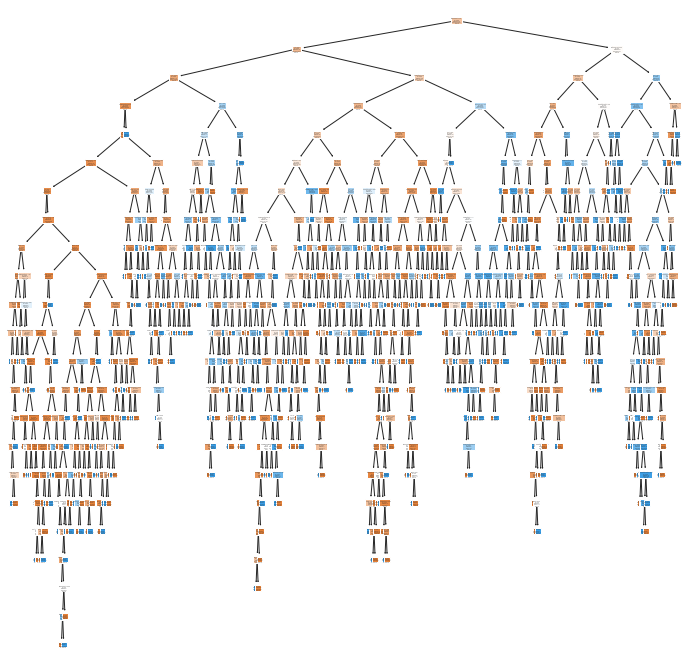

In [44]:
# We will plot the tree ensembles of our RF model
from sklearn.tree import plot_tree
import mpld3

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(rf_classifier.estimators_[0], feature_names=list(df.columns)[
          :-1], class_names=list(df.columns)[-1], filled=True, ax=ax)

output_file = 'decision_tree.html'
mpld3.save_html(fig, output_file)
print(f"Interactive decision tree saved as: {output_file}")


### Using an Ensemble of Models for Better Performance

Now, we will use several different classifiers (MLP Classifier, Logistic Regression, SVC, RF Classifier), and use a voting classifier to detect the best accuracy among all these different classifiers.


In [45]:
# First, we will import our classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# We will perform a standard scalar to our training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize individual classifiers
classifier_1 = RandomForestClassifier(random_state=42)
classifier_2 = LogisticRegression(random_state=42)
classifier_3 = SVC(random_state=42, probability=True)
classifier_4 = MLPClassifier(solver='adam', alpha=1e-4,
                             hidden_layer_sizes=(5, 2), random_state=1, max_iter=500)

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('rf', classifier_1), ('lr', classifier_2),
                ('svm', classifier_3), ("MLP", classifier_4)],
    voting='soft'
)

# Train the Voting Classifier
voting_classifier.fit(X_train_scaled, y_train)

y_pred = voting_classifier.predict(X_test_scaled)

# Evaluate the Voting Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8115134633240483
